#                                 Objective: House Price Prediction

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

# EDA

## Variable Identification

Here  we identify the datatypes of each and every features, so that it will be useful for selecting a technique of uni/bivariate analysis

Data types of all features of training data has been stored in a list

In [3]:
# for train data
train_list_feature=list(df_train.dtypes)
train_list_featuretype=[]
for i in range(len(train_list_feature)):
    train_list_featuretype.append(str(train_list_feature[i]))

Data types of all features of testing data has been stored in a list

In [4]:
# for test data
test_list_feature=list(df_test.dtypes)
test_list_featuretype=[]
for i in range(len(test_list_feature)):
    test_list_featuretype.append(str(test_list_feature[i]))

Seperating numerical and categorical variable in training data superficially

In [5]:
# Sepertaing numerical and categorical variable
train_numerical_feature=[]
train_categorical_feature=[]
for i in range(len(train_list_featuretype)):
    if(train_list_featuretype[i]=='object'):
        train_categorical_feature.append(df_train.columns[i])
    else:
        train_numerical_feature.append(df_train.columns[i])
print(len(train_numerical_feature))
print(len(train_categorical_feature))

38
43


In [6]:
df_train[train_numerical_feature].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
for i in range(len(train_numerical_feature)):
    print('{}: {}'.format(train_numerical_feature[i],len(df_train[train_numerical_feature[i]].unique())))

Id: 1460
MSSubClass: 15
LotFrontage: 111
LotArea: 1073
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
MasVnrArea: 328
BsmtFinSF1: 637
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
TotRmsAbvGrd: 12
Fireplaces: 4
GarageYrBlt: 98
GarageCars: 5
GarageArea: 441
WoodDeckSF: 274
OpenPorchSF: 202
EnclosedPorch: 120
3SsnPorch: 20
ScreenPorch: 76
PoolArea: 8
MiscVal: 21
MoSold: 12
YrSold: 5
SalePrice: 663


Now lets transfer the variables which are numerical but it has only few distinct values to categorical feature

In [8]:
train_categorical_feature1=train_categorical_feature.copy()
train_numerical_feature1=train_numerical_feature.copy()

We use the threshold of 5 distinct values. If the variable has 5 distinct values or less we will transfer it to categorical feature

In [9]:
for i in range(len(train_numerical_feature)):
    if(len(df_train[train_numerical_feature[i]].unique())<=5):
        train_categorical_feature1.append(train_numerical_feature[i])
        train_numerical_feature1.remove(train_numerical_feature[i])

In [10]:
for i in range(len(train_numerical_feature1)):
    print('{}: {}'.format(train_numerical_feature1[i],len(df_train[train_numerical_feature1[i]].unique())))

Id: 1460
MSSubClass: 15
LotFrontage: 111
LotArea: 1073
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
MasVnrArea: 328
BsmtFinSF1: 637
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BedroomAbvGr: 8
TotRmsAbvGrd: 12
GarageYrBlt: 98
GarageArea: 441
WoodDeckSF: 274
OpenPorchSF: 202
EnclosedPorch: 120
3SsnPorch: 20
ScreenPorch: 76
PoolArea: 8
MiscVal: 21
MoSold: 12
SalePrice: 663


No need to seperate numerical and categorical variables for test data as the test data also have the same split of variables as training data. But still the train_numerical_feature has SalePrice, so we remove it as it is a tartget variable and then we copy it to test_numerical_variable

In [11]:
try:
    train_numerical_feature1.remove('SalePrice')
    test_numerical_feature1=train_numerical_feature1.copy()
except:
    test_numerical_feature1=train_numerical_feature1.copy()

In [12]:
test_categorical_feature1=train_categorical_feature1.copy()

Understand the number of NaN in our training data

In [13]:
df_train[train_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  TotRmsAb

Understand the number of NaN in our test data

In [14]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BedroomAbvGr   1459 non-null   int64  
 18  TotRmsAb

In [67]:
print(df_train['SalePrice'].isna().any())

False


## Univariate Analysis of Train data

For numerical values

We can't analysis for the feature with atleast one NaN, so analyze only the feature without NaN. 

<IPython.core.display.Javascript object>


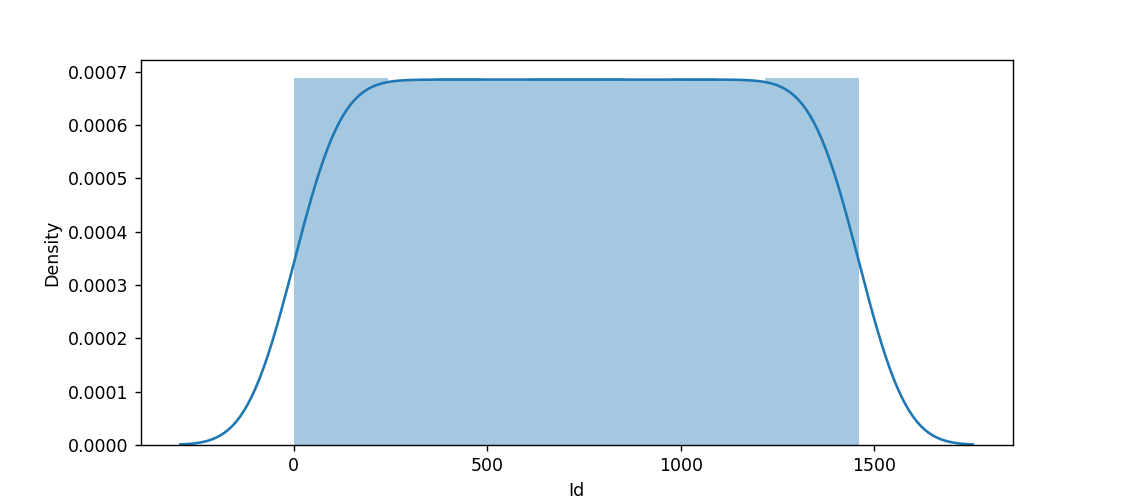

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


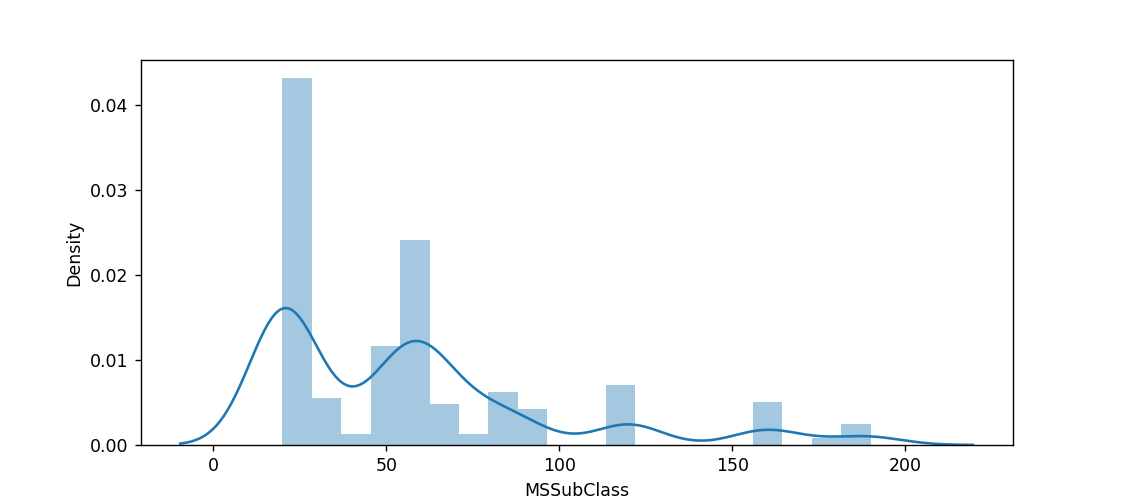

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


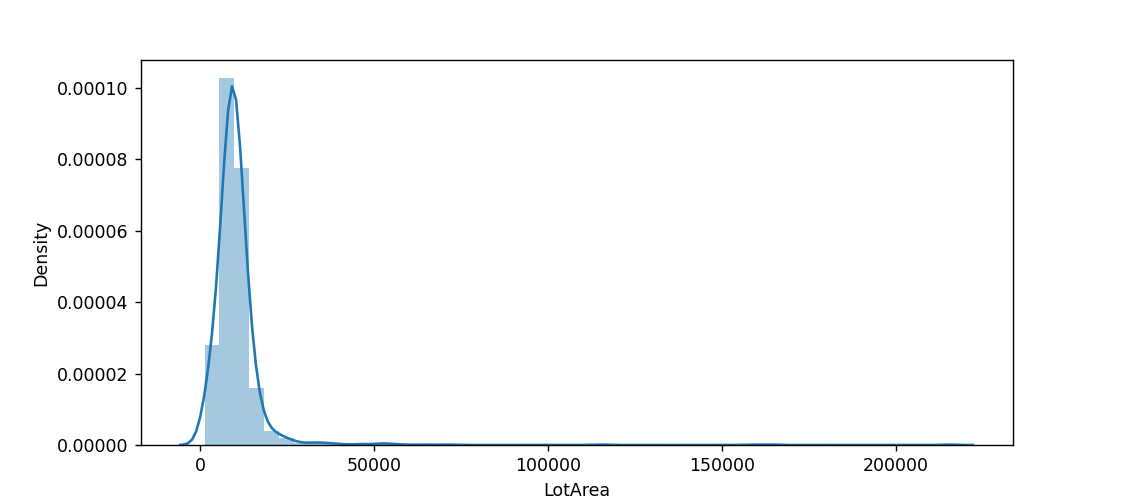

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


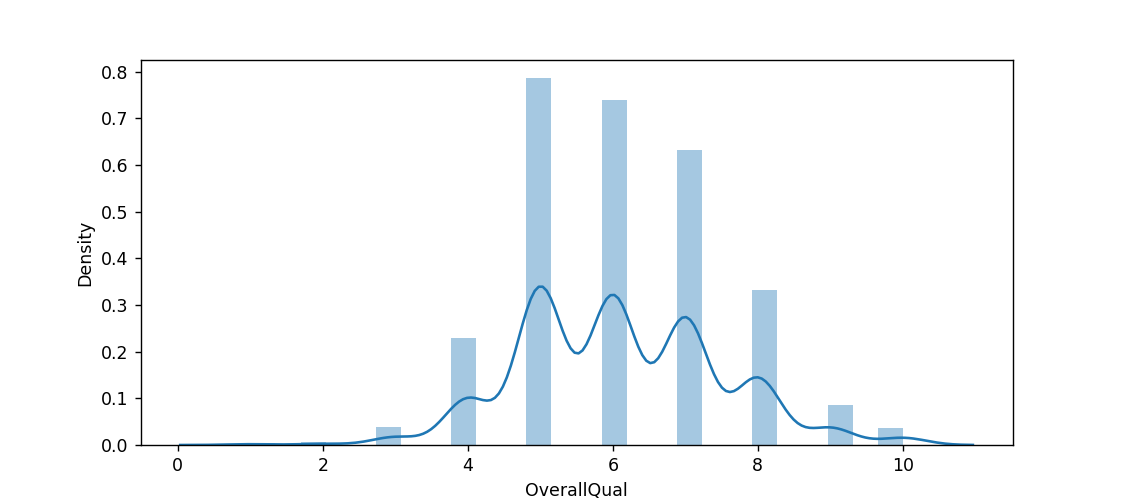

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


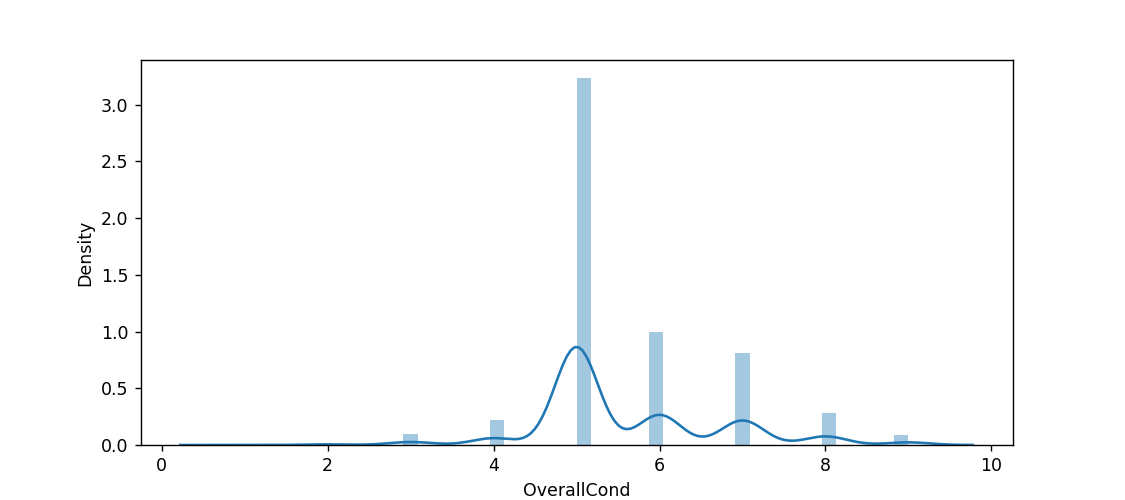

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


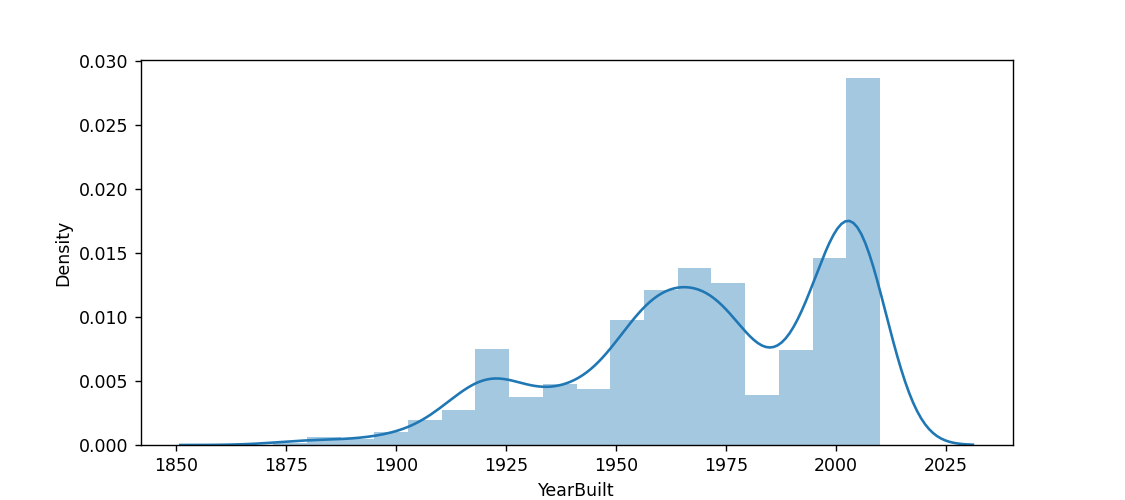

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


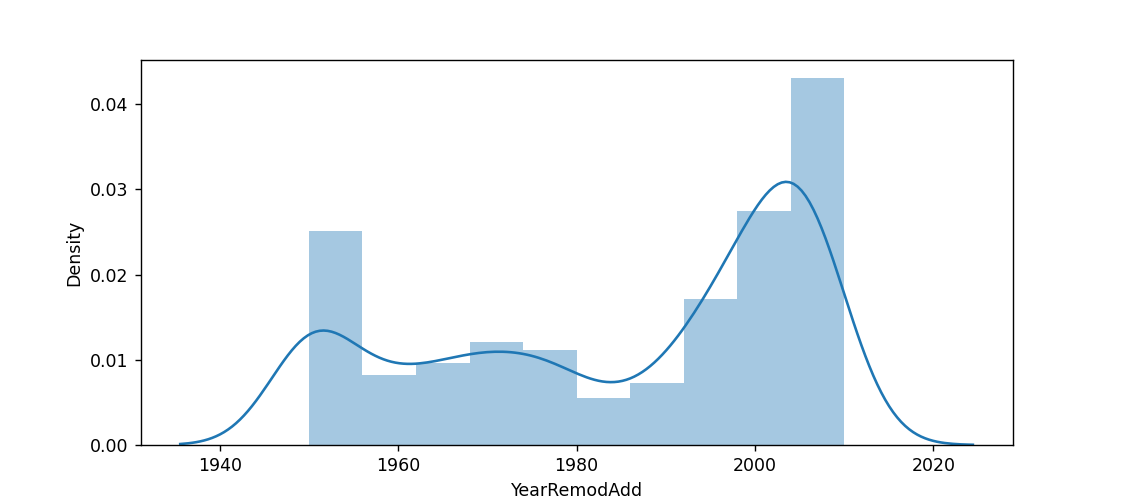

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


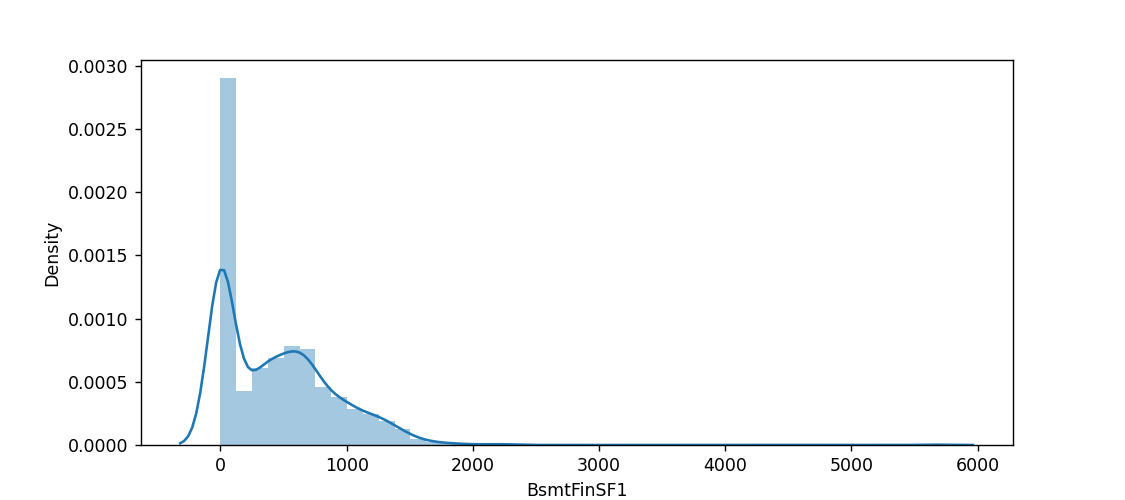

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


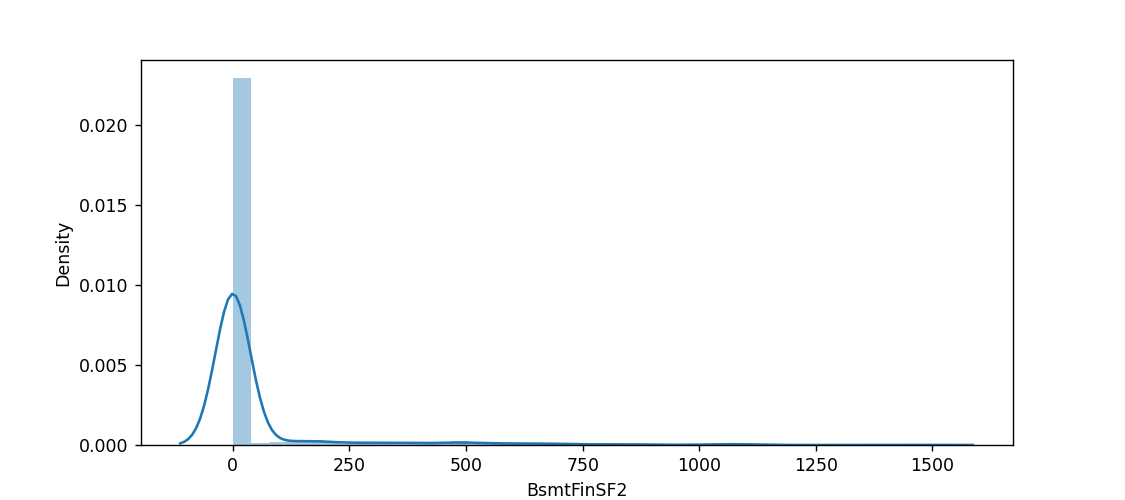

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


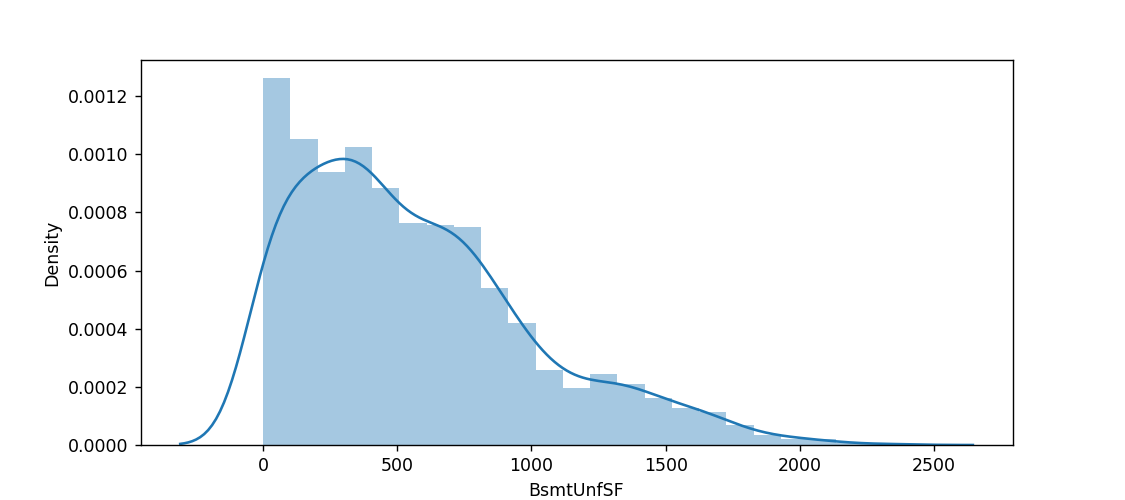

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


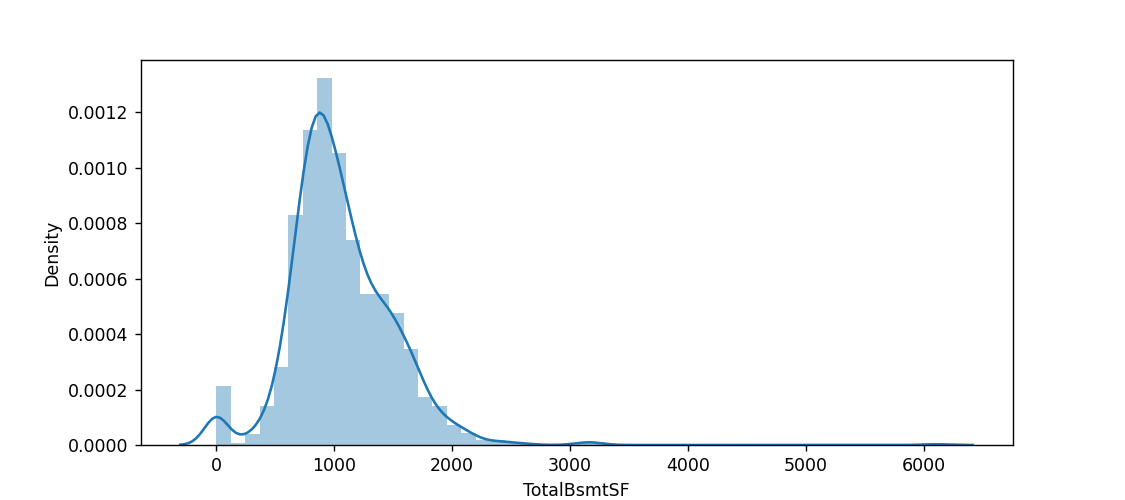

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


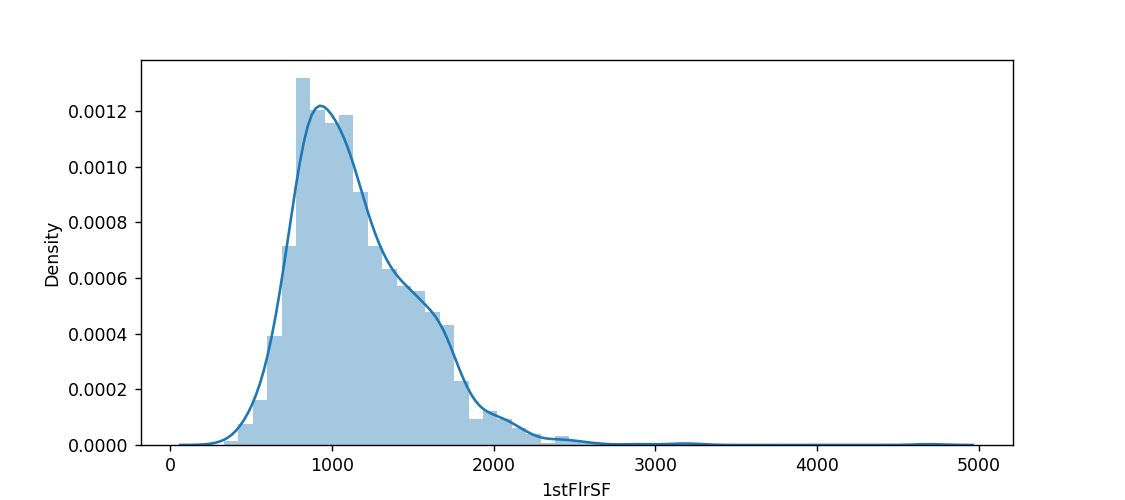

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


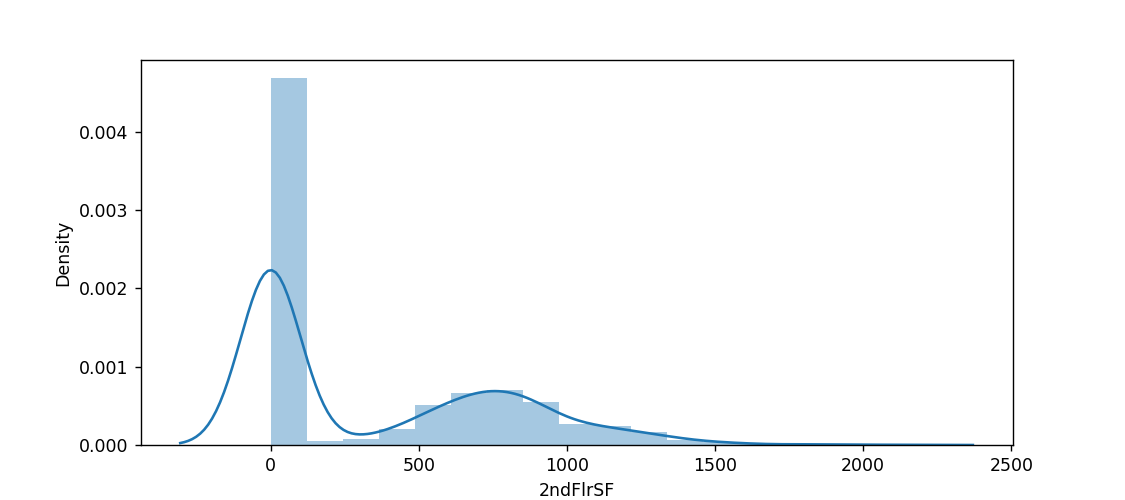

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


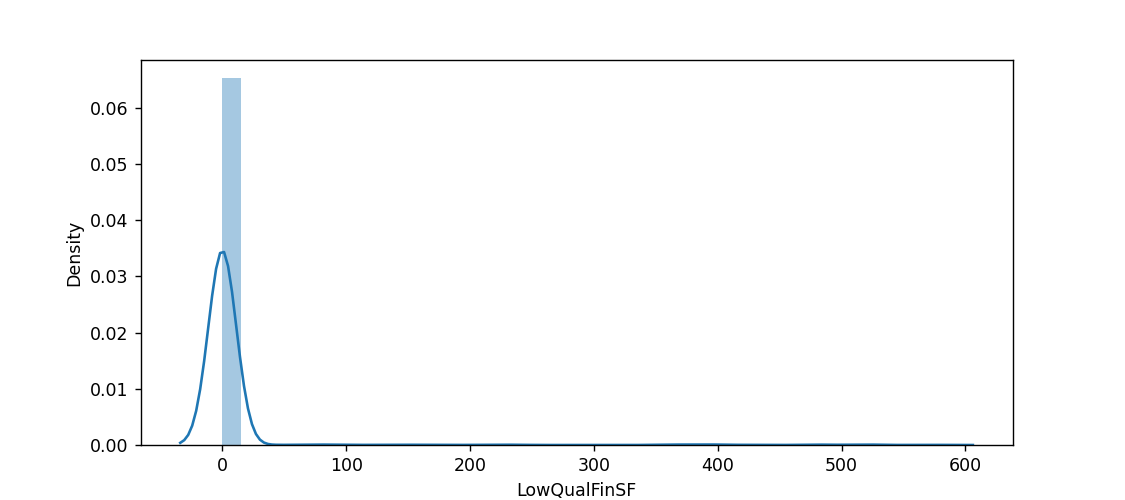

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


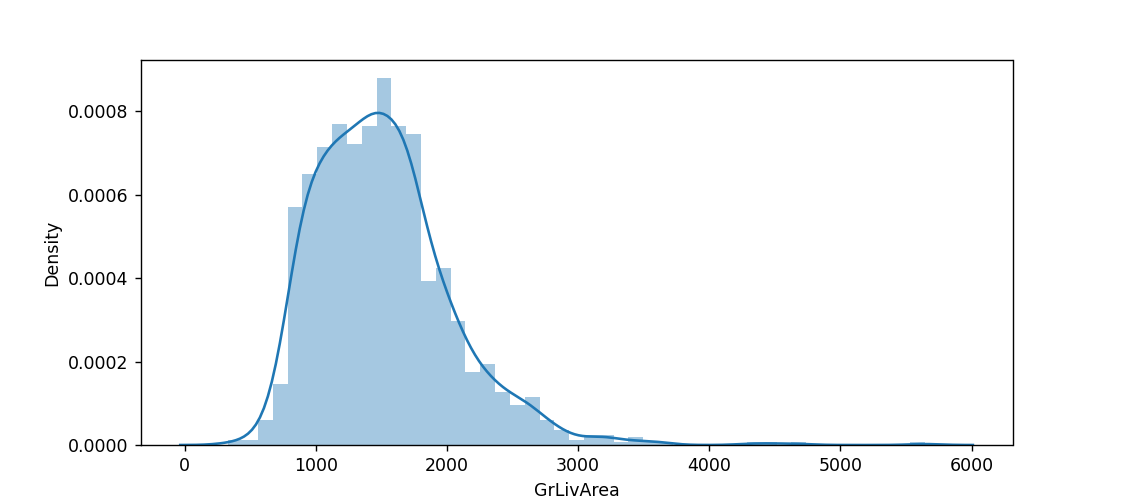

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


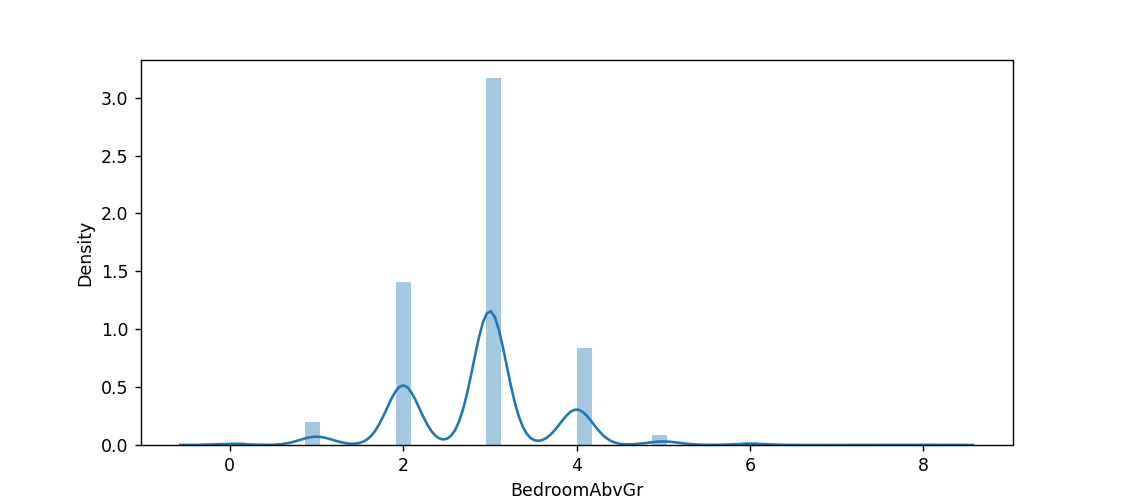

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


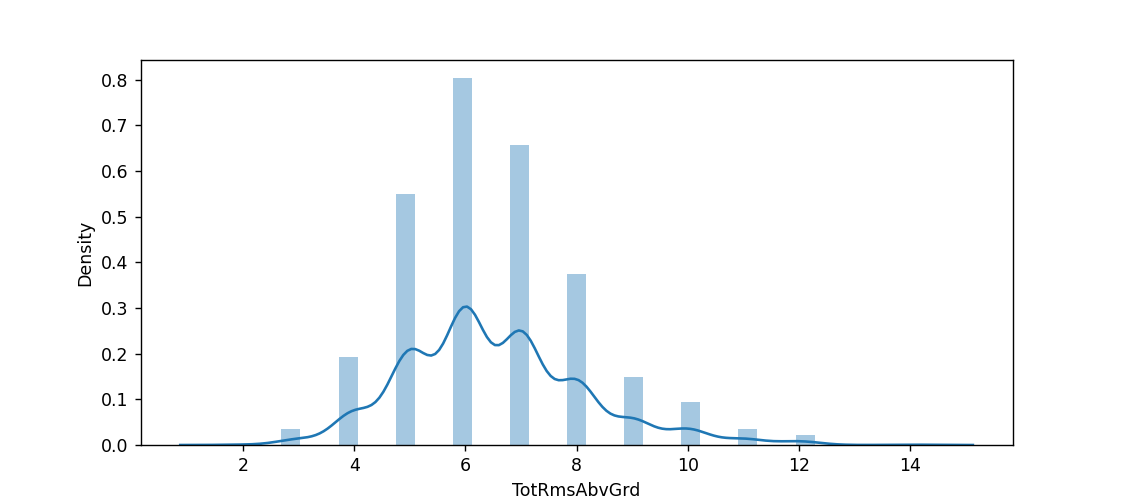

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


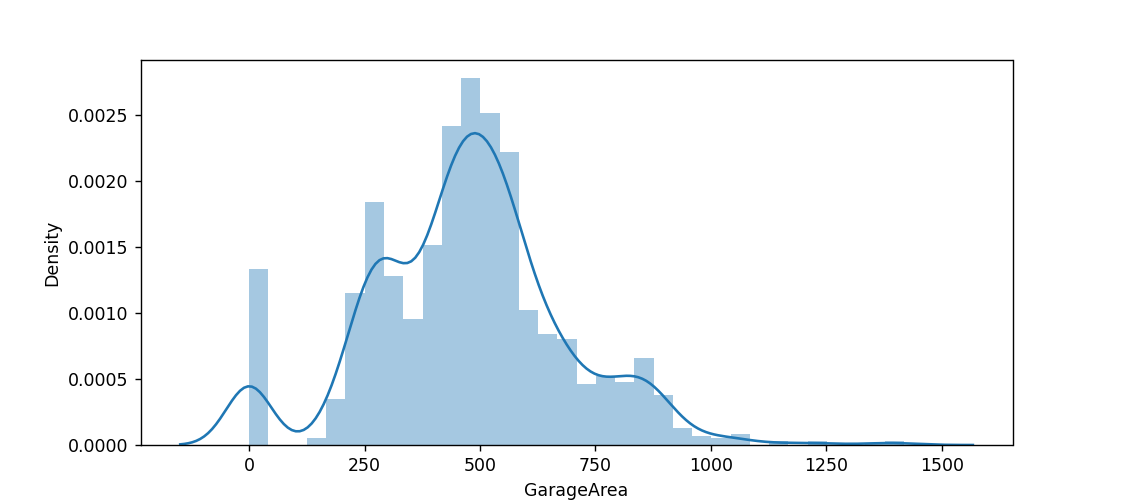

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


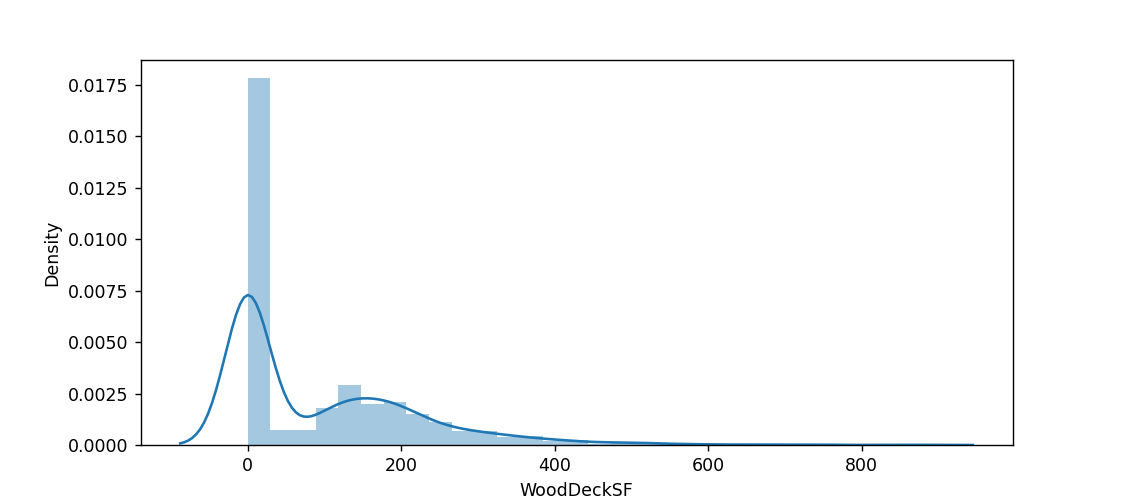

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


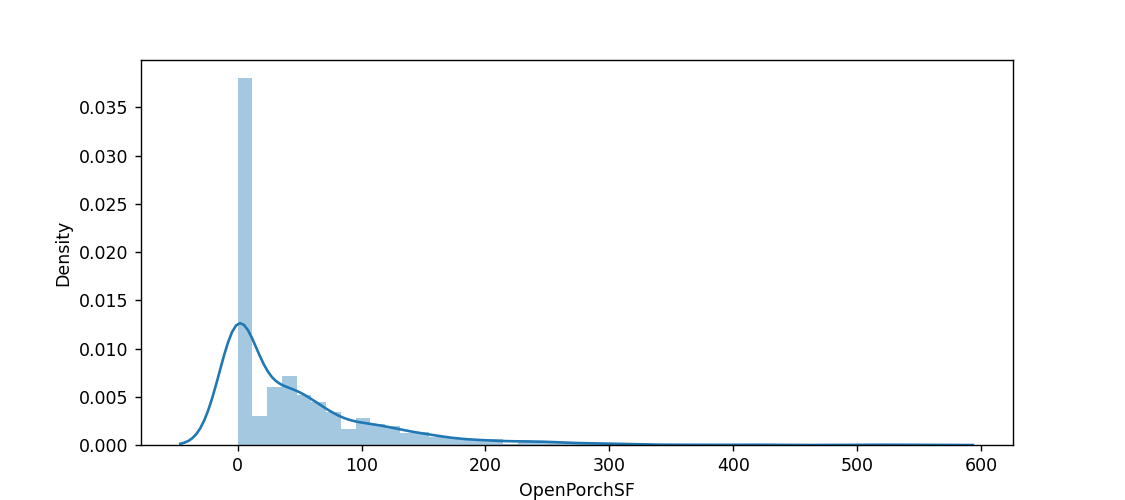

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\parth\AppData\Local\Temp\ipykernel_9472\1939026746.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9, 4))


<IPython.core.display.Javascript object>


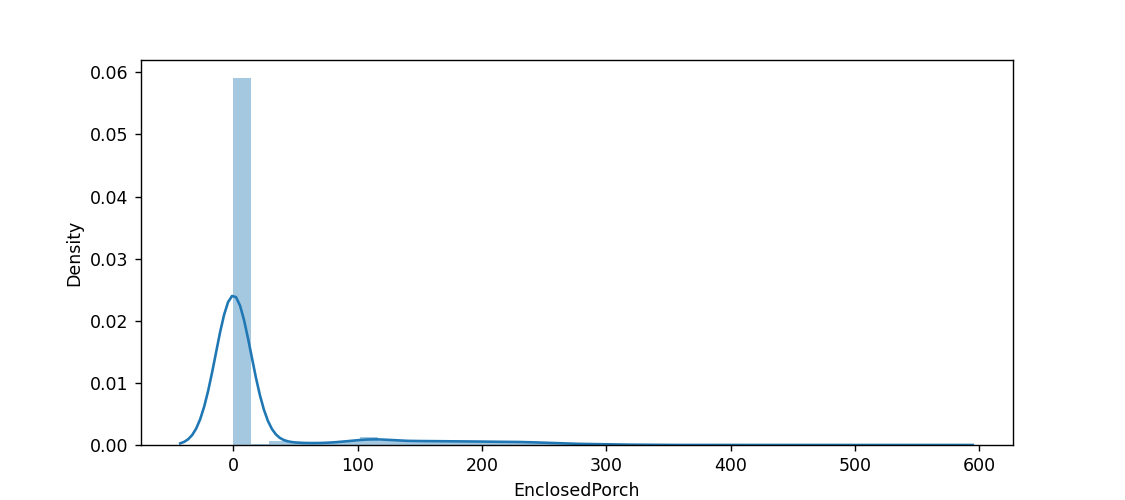

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


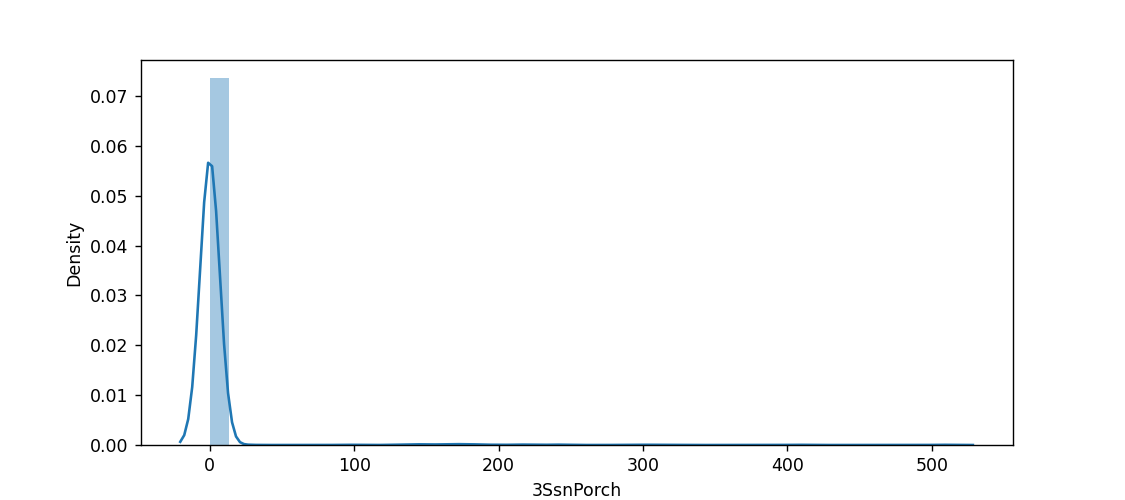

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


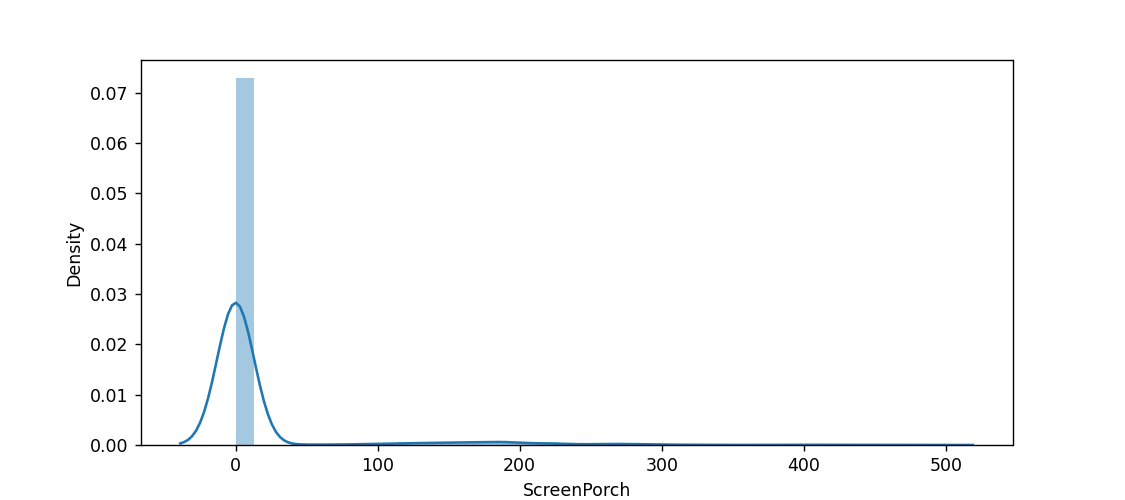

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


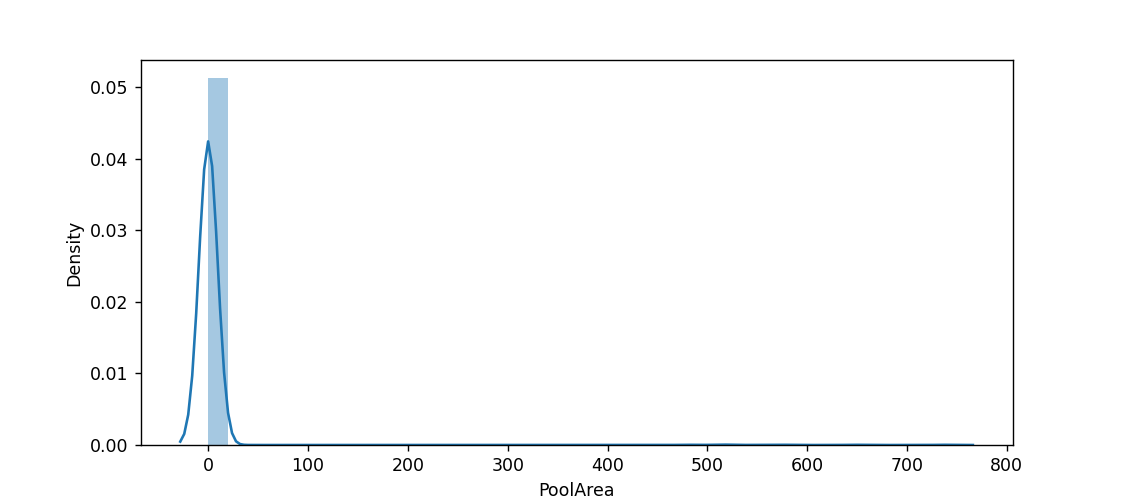

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


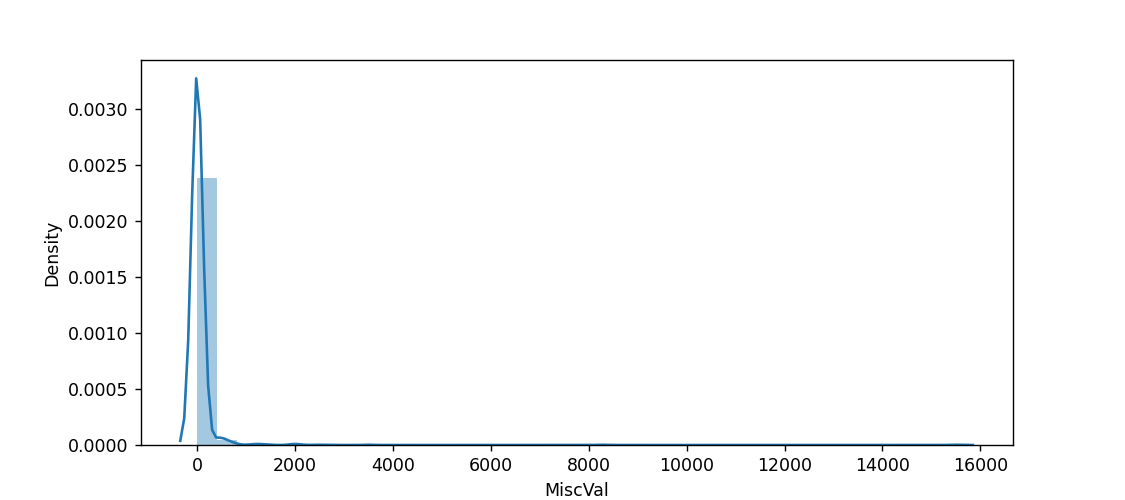

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


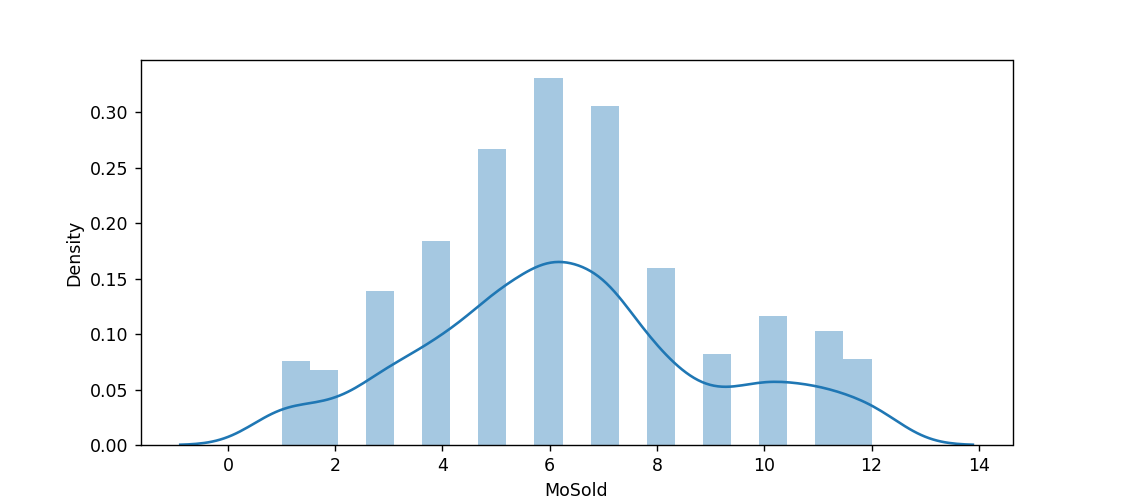

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [16]:
for i in range(len(train_numerical_feature1)):
    if(df_train[train_numerical_feature1[i]].isna().any()==False):
        plt.figure(figsize=(9, 4))
        ax = sns.distplot(df_train[train_numerical_feature1[i]])
        plt.show()
    else:
        pass

For categorical Variable

In [17]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

MSZoning


<IPython.core.display.Javascript object>


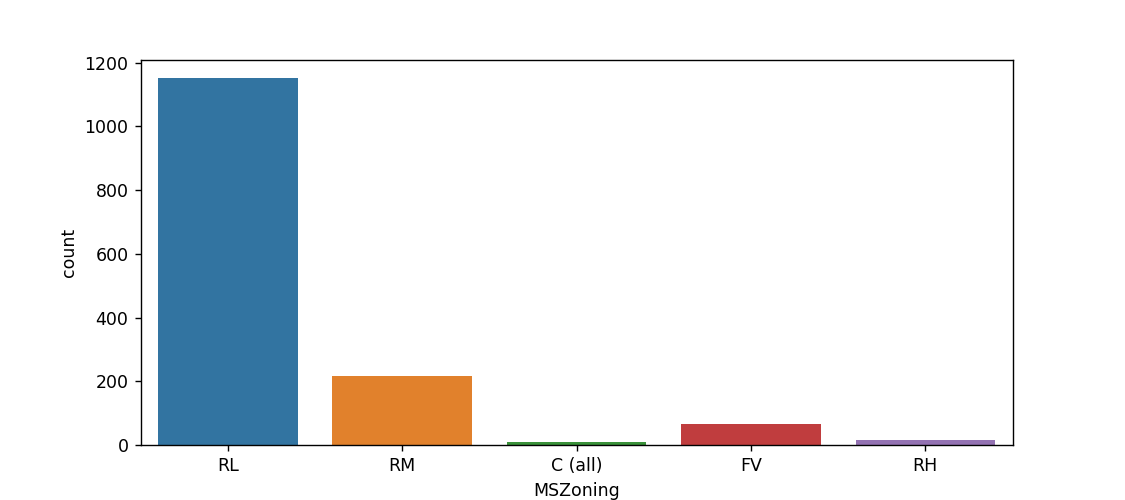

Street


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


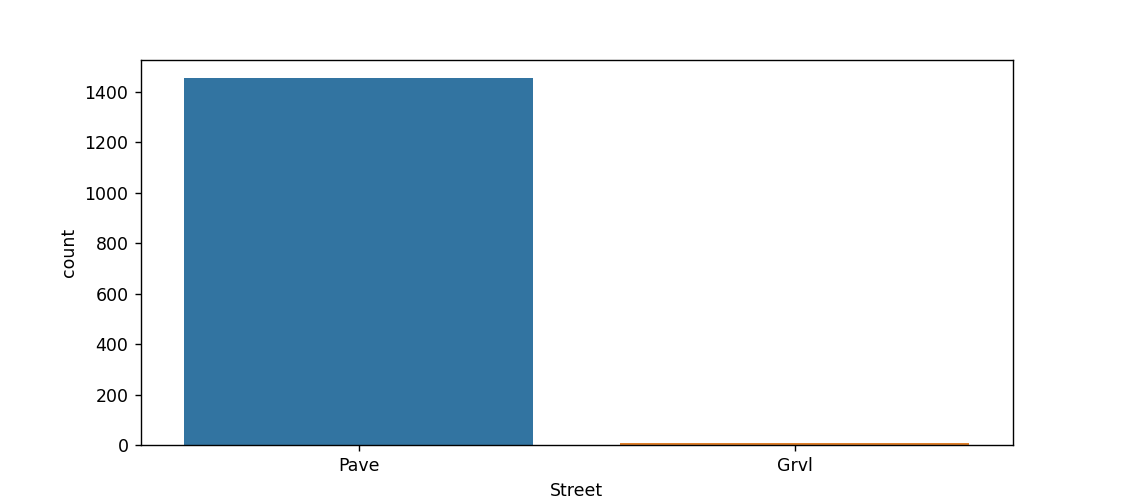

LotShape


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


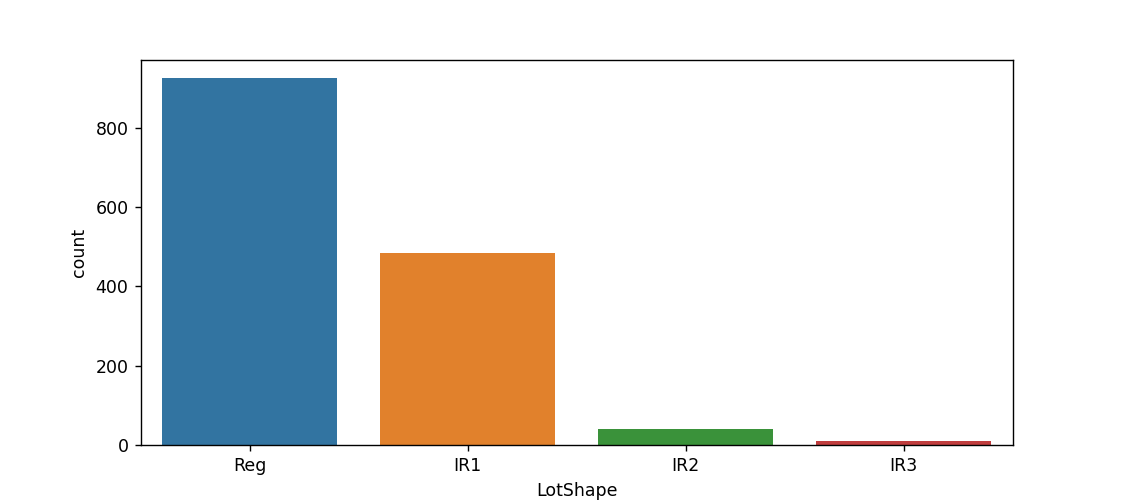

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LandContour


<IPython.core.display.Javascript object>


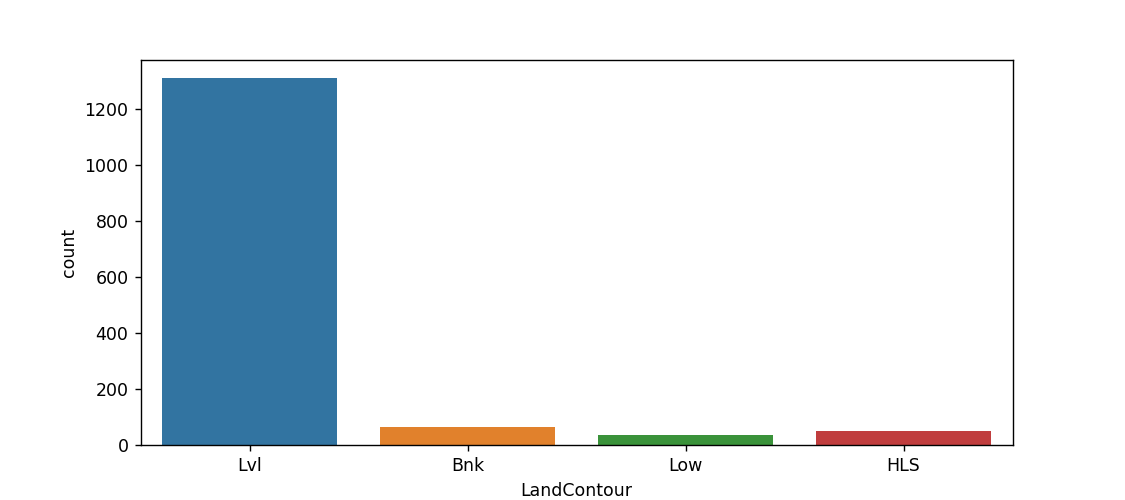

Utilities


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


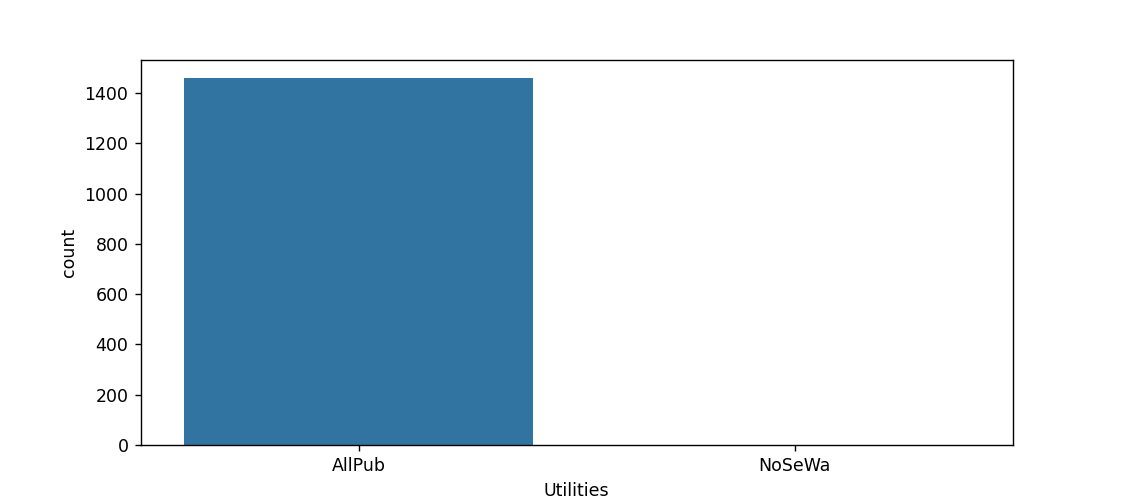

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LotConfig


<IPython.core.display.Javascript object>


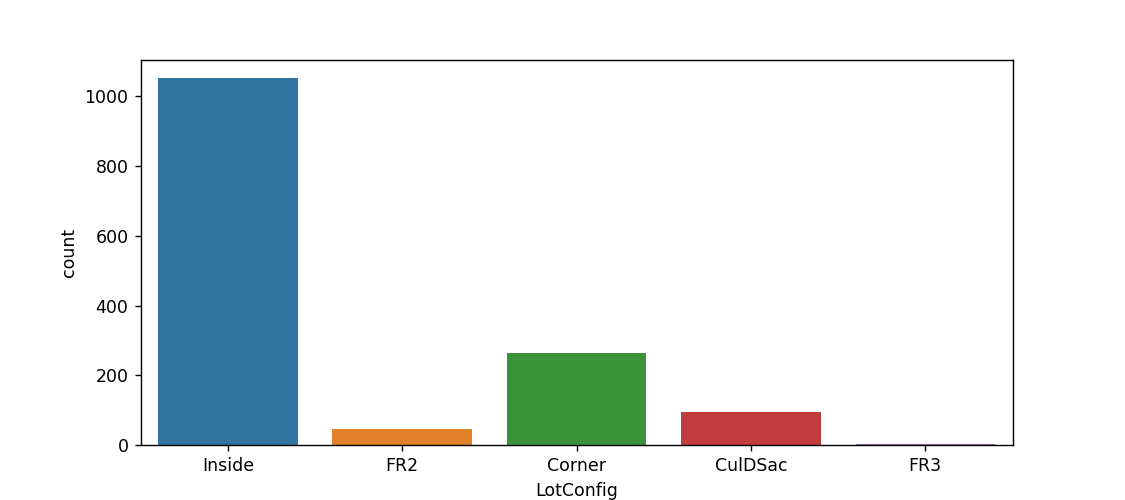

LandSlope


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


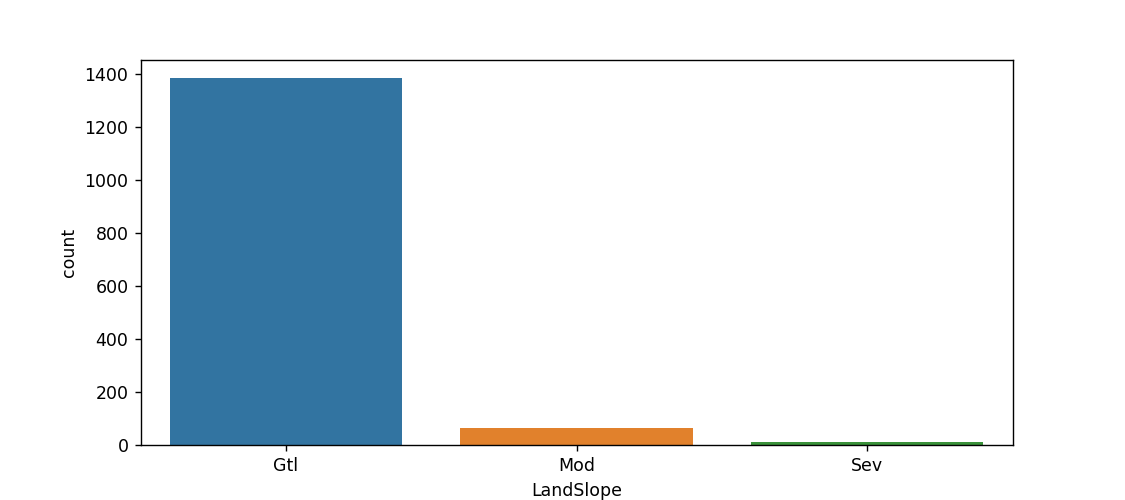

Neighborhood


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


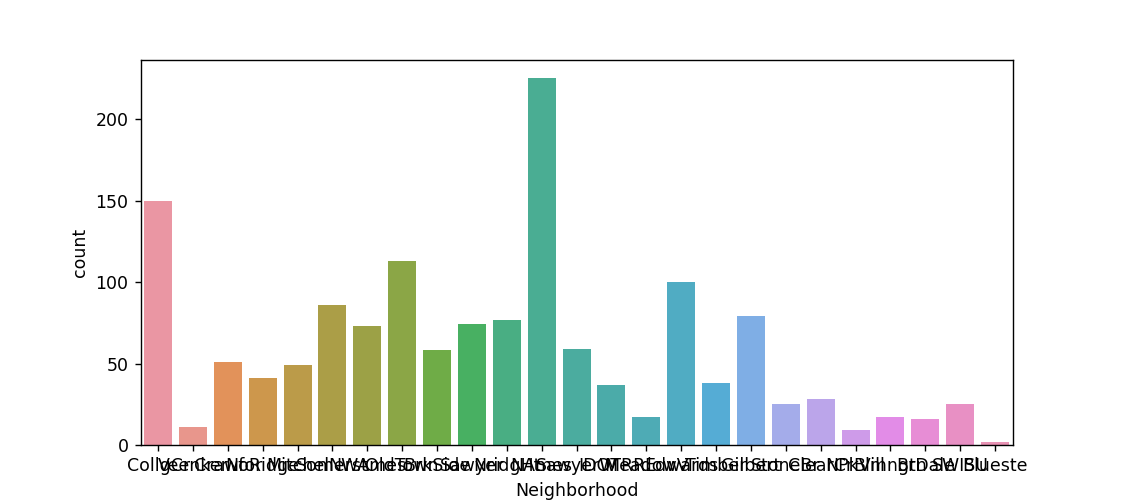

Condition1


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


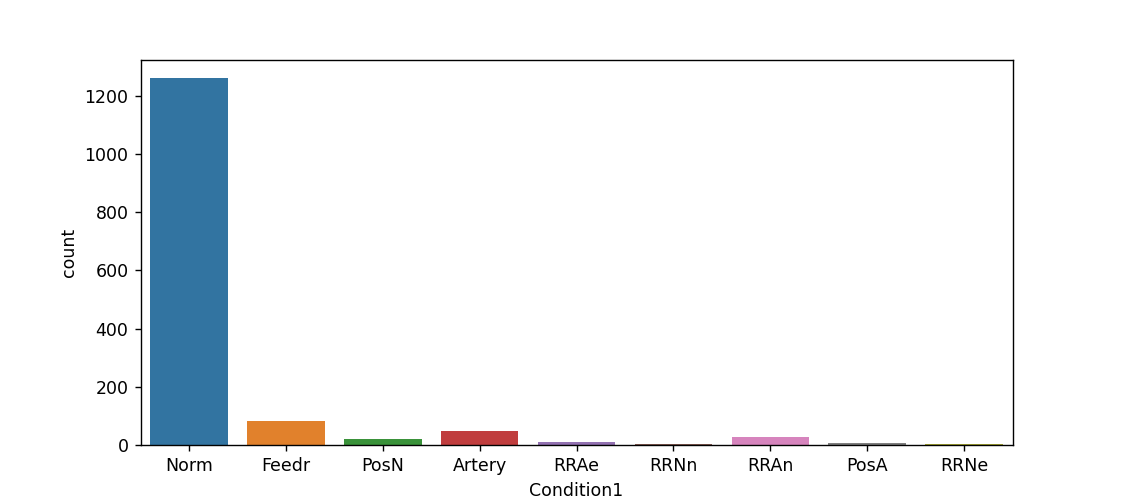

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Condition2


<IPython.core.display.Javascript object>


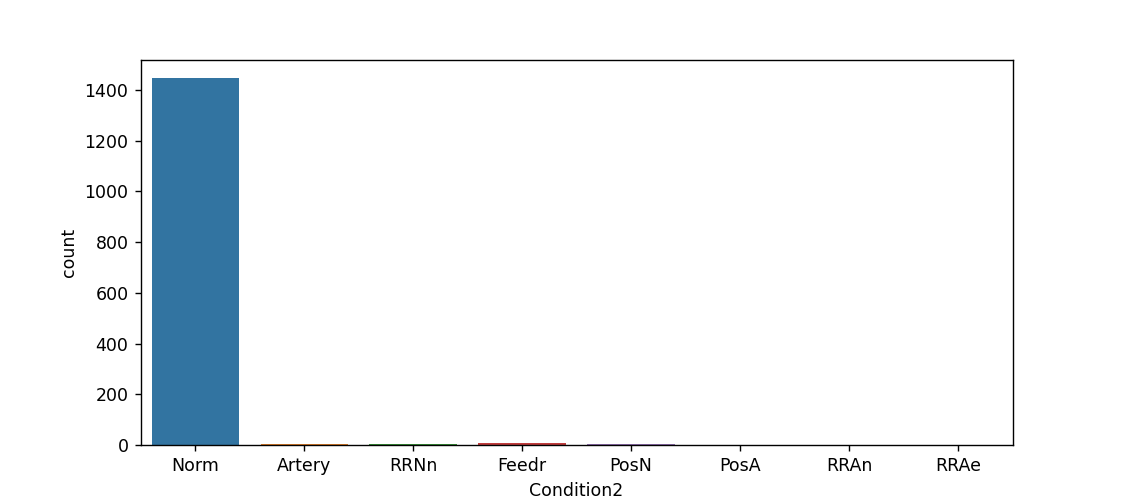

BldgType


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


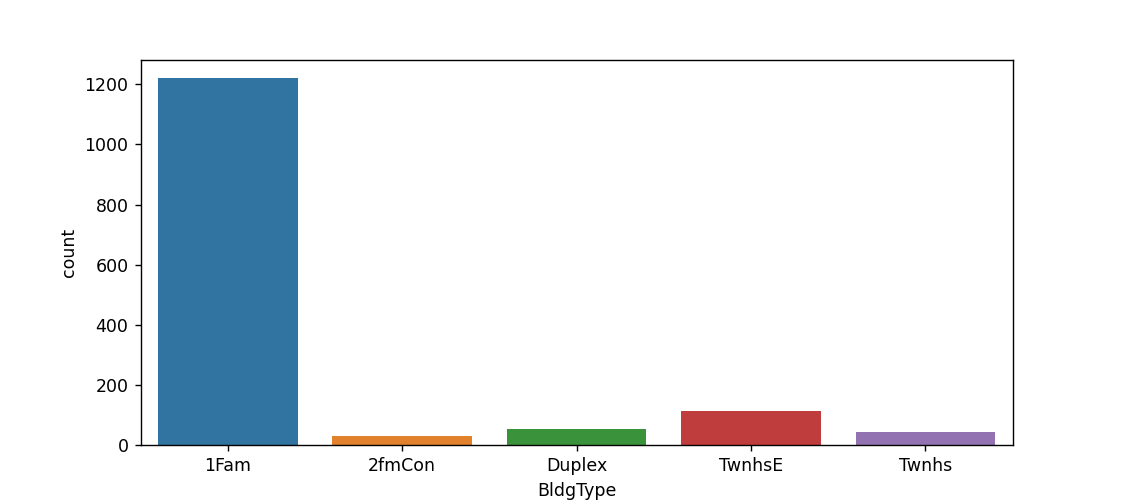

HouseStyle


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


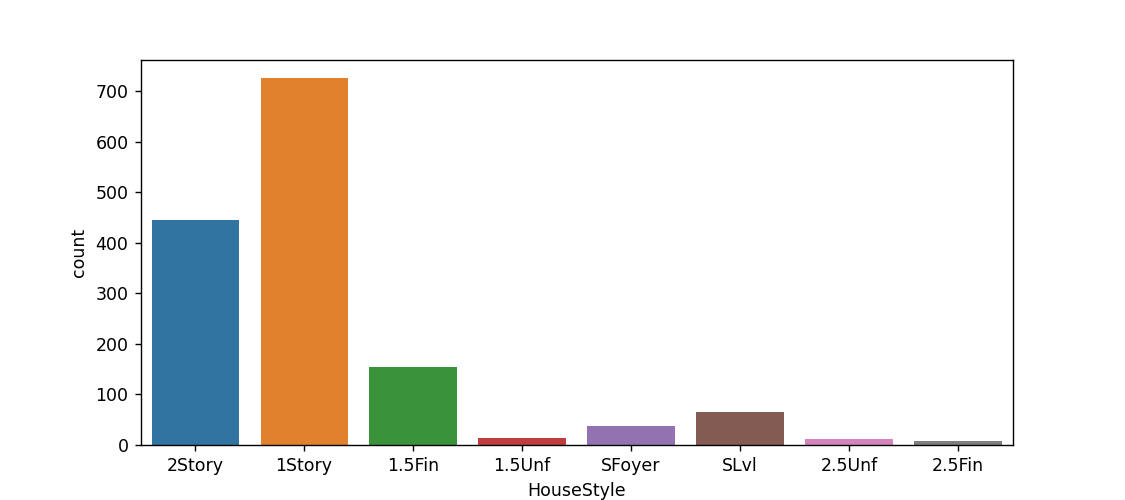

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RoofStyle


<IPython.core.display.Javascript object>


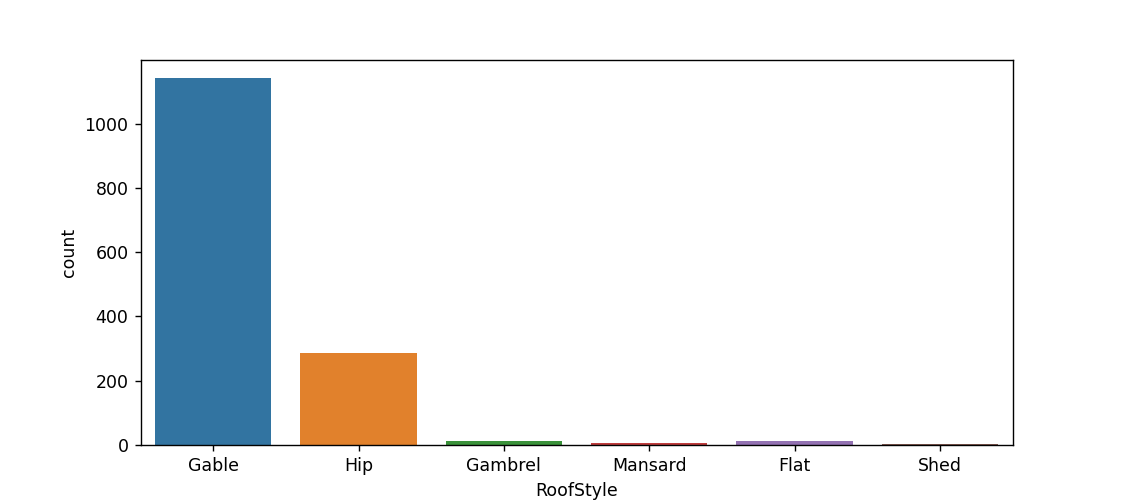

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RoofMatl


<IPython.core.display.Javascript object>


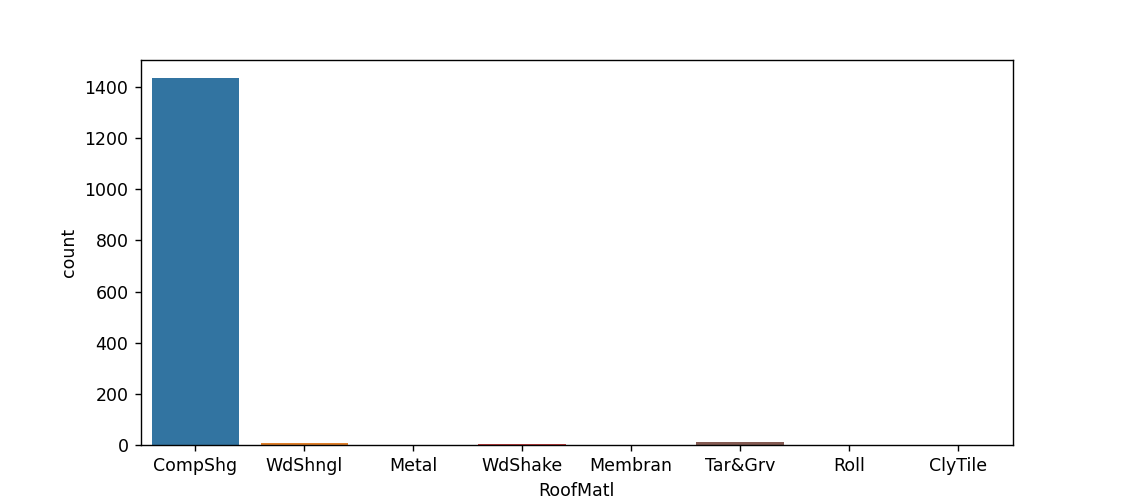

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Exterior1st


<IPython.core.display.Javascript object>


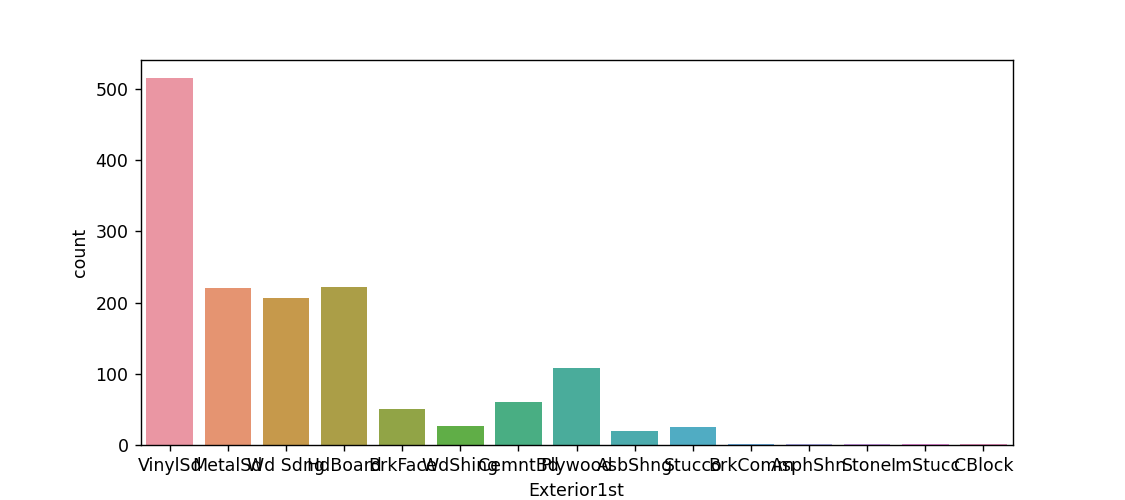

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Exterior2nd


<IPython.core.display.Javascript object>


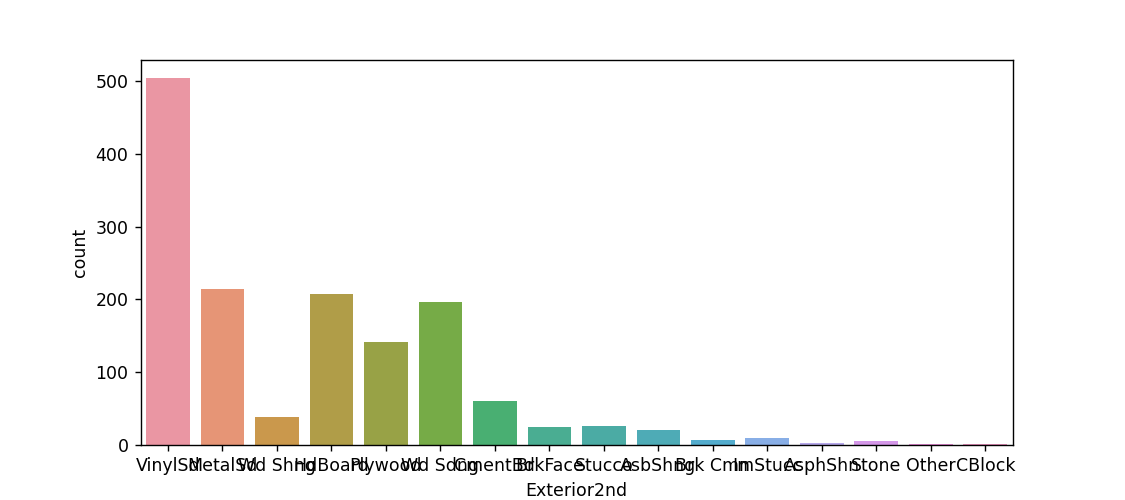

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ExterQual


<IPython.core.display.Javascript object>


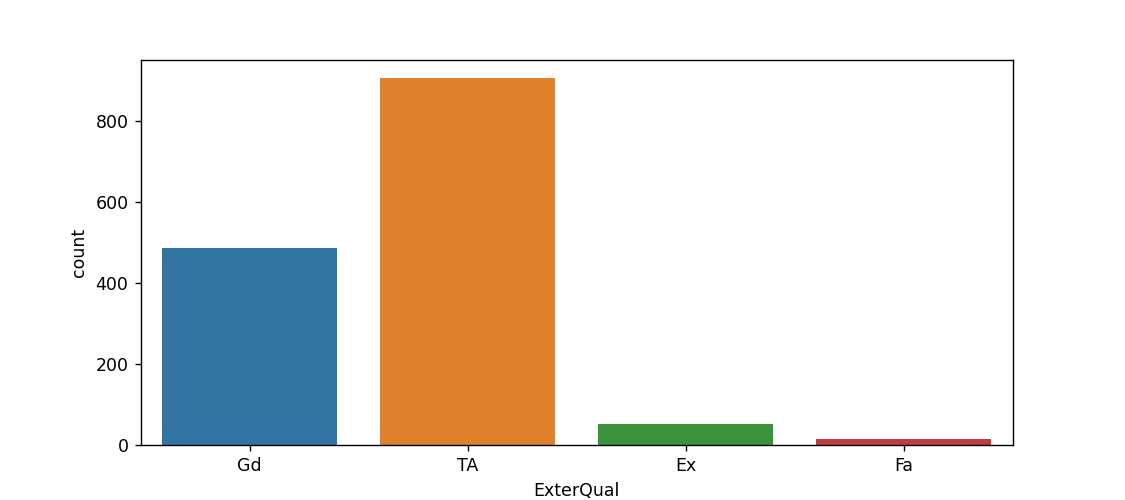

ExterCond


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


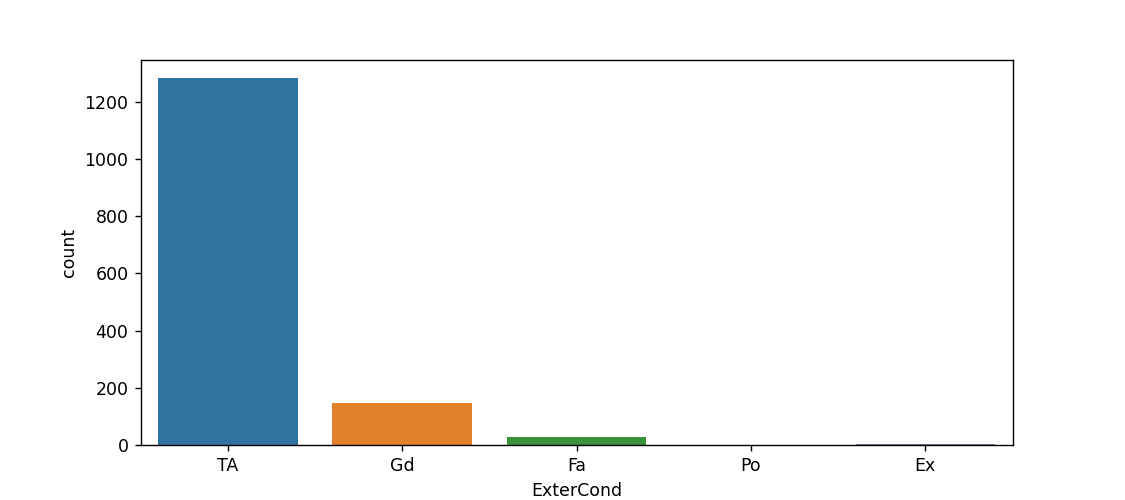

Foundation


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


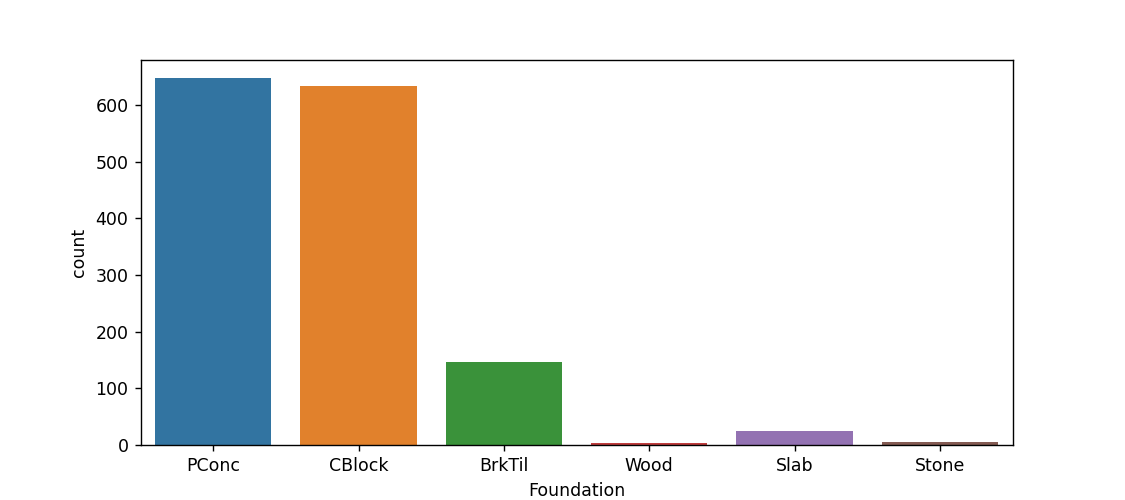

Heating


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


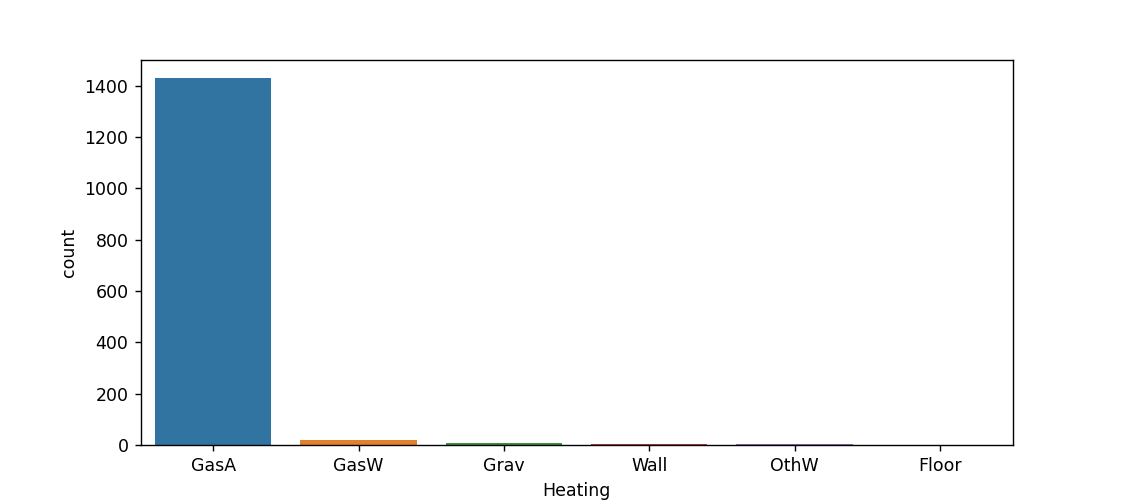

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HeatingQC


<IPython.core.display.Javascript object>


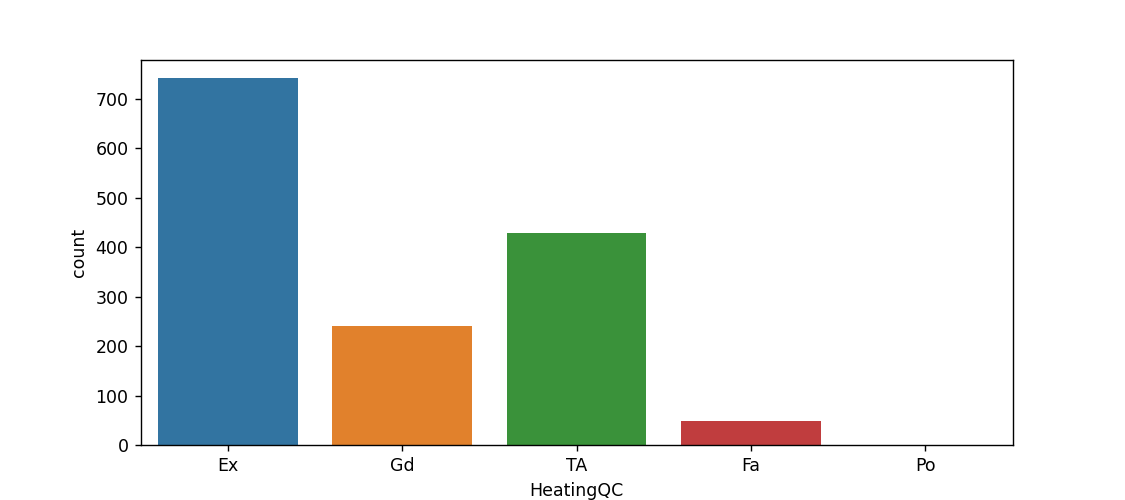

CentralAir


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


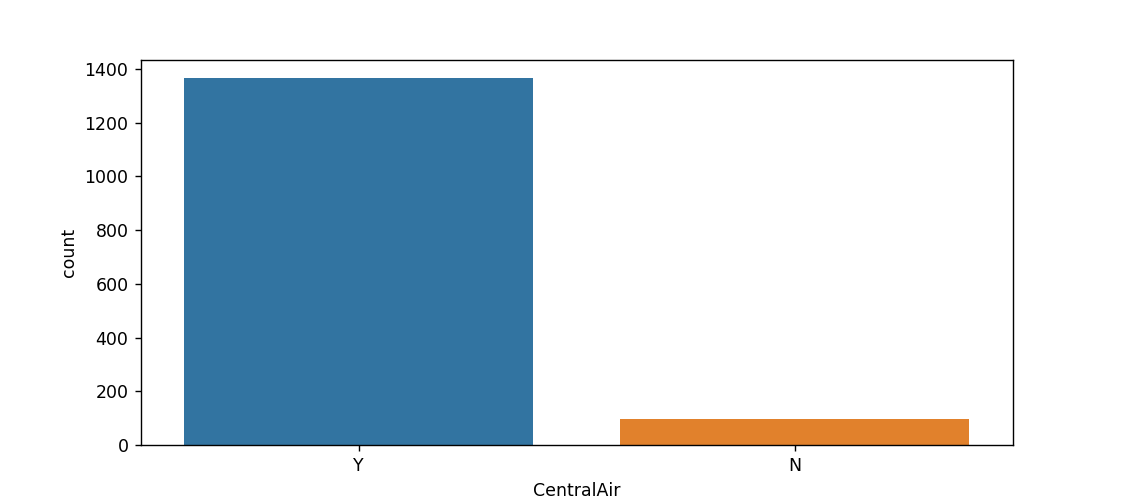

KitchenQual


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


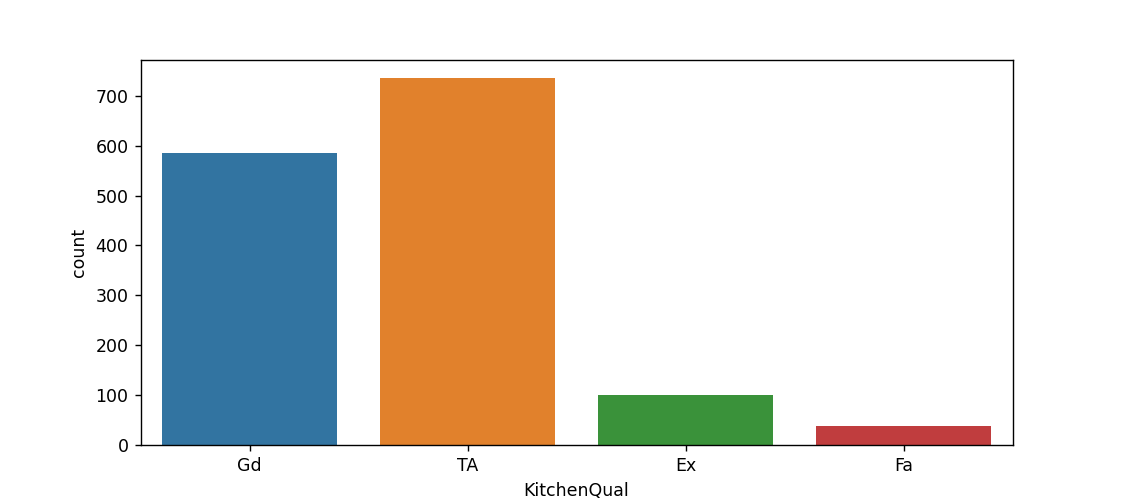

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Functional


<IPython.core.display.Javascript object>


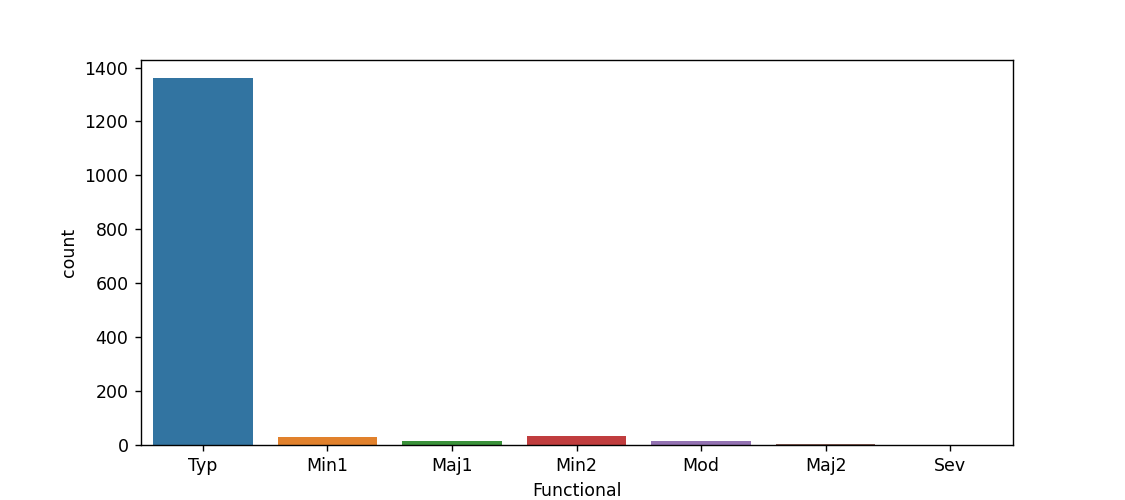

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PavedDrive


<IPython.core.display.Javascript object>


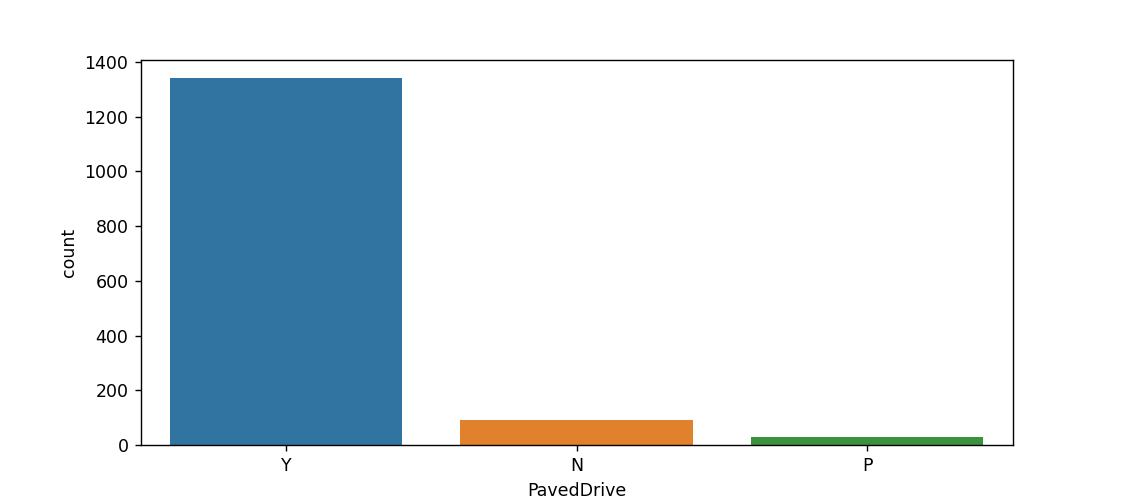

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SaleType


<IPython.core.display.Javascript object>


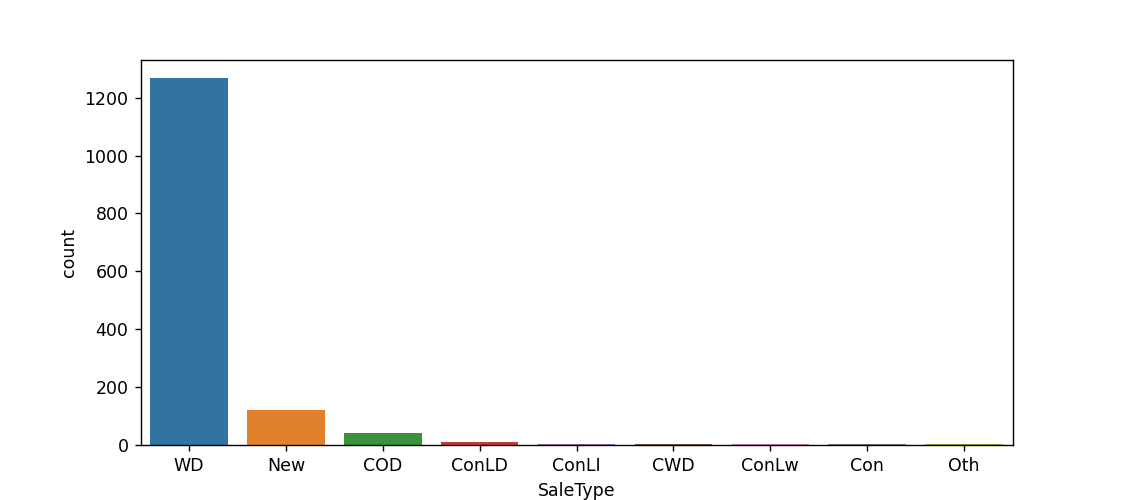

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SaleCondition


<IPython.core.display.Javascript object>


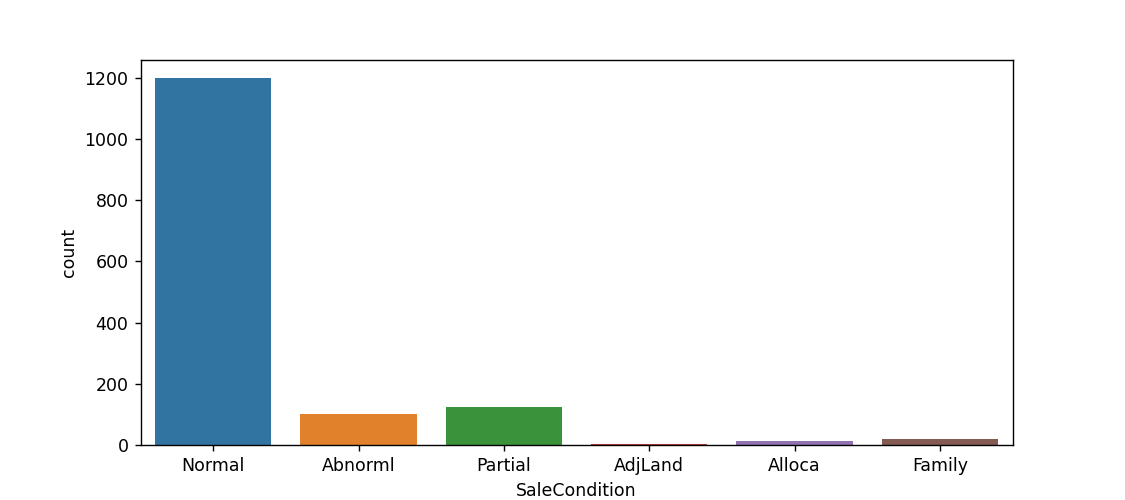

BsmtFullBath


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


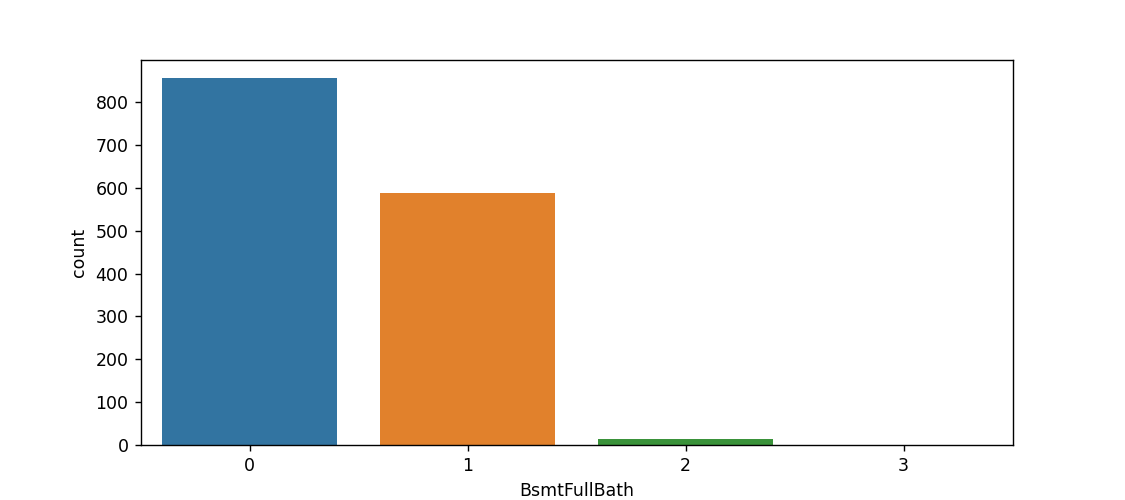

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


BsmtHalfBath


<IPython.core.display.Javascript object>


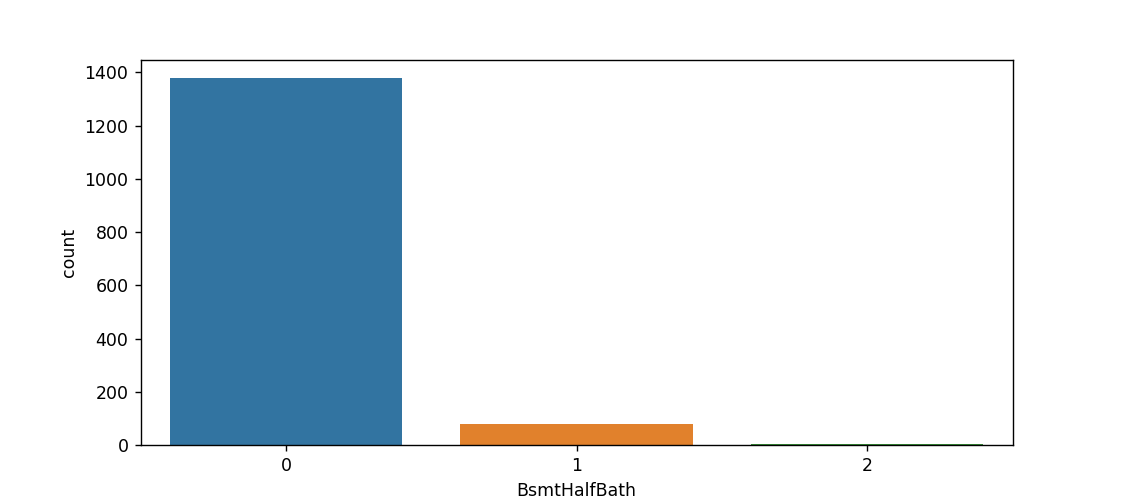

FullBath


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


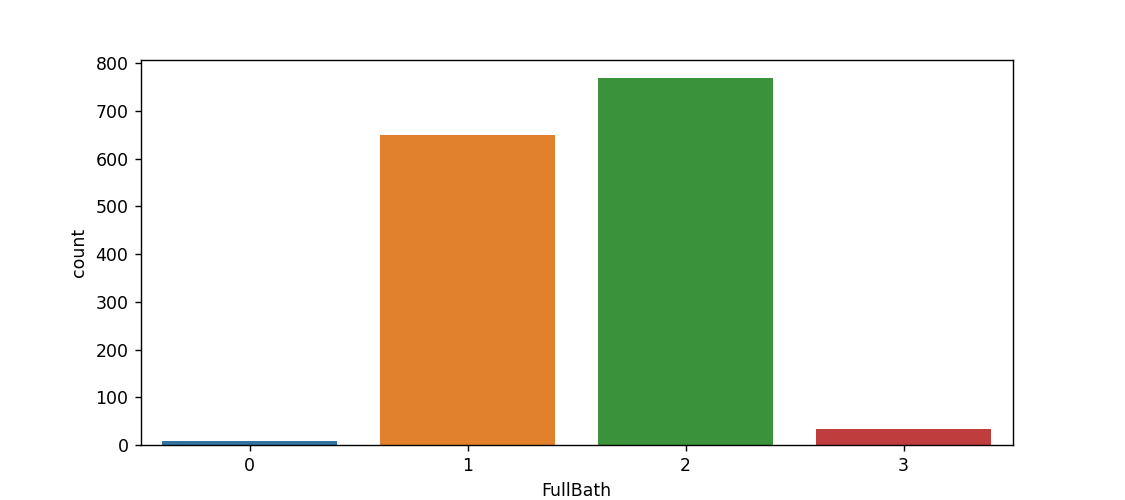

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HalfBath


<IPython.core.display.Javascript object>


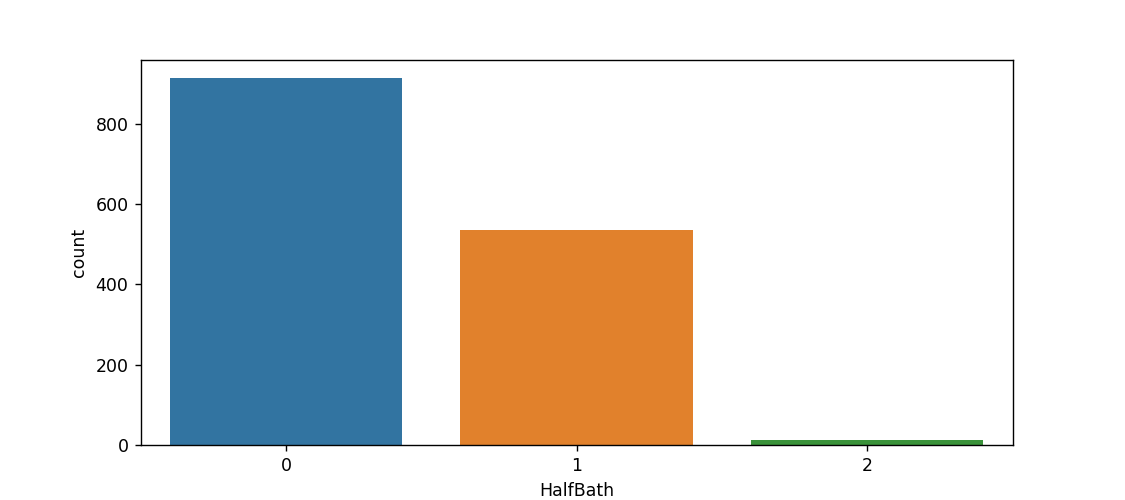

KitchenAbvGr


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


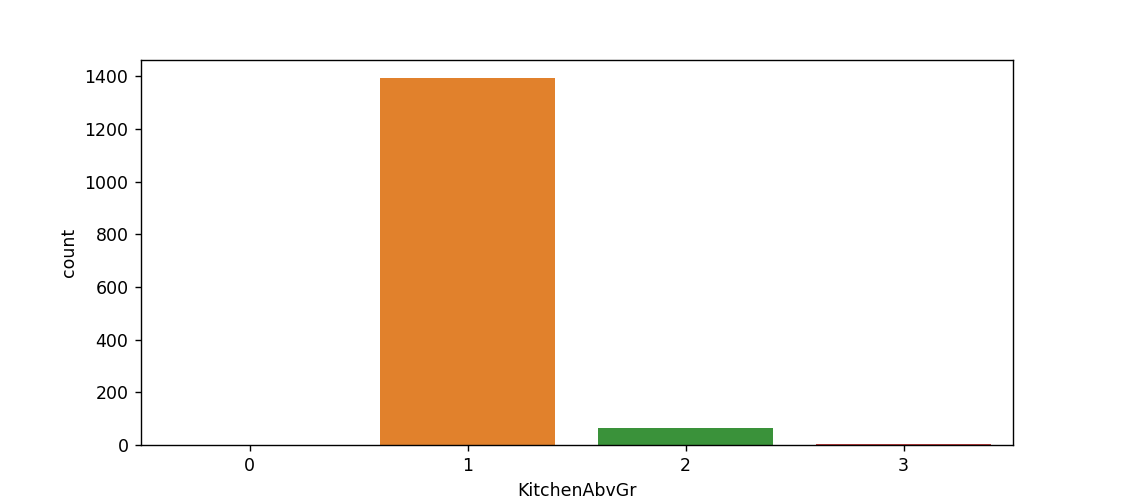

Fireplaces


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


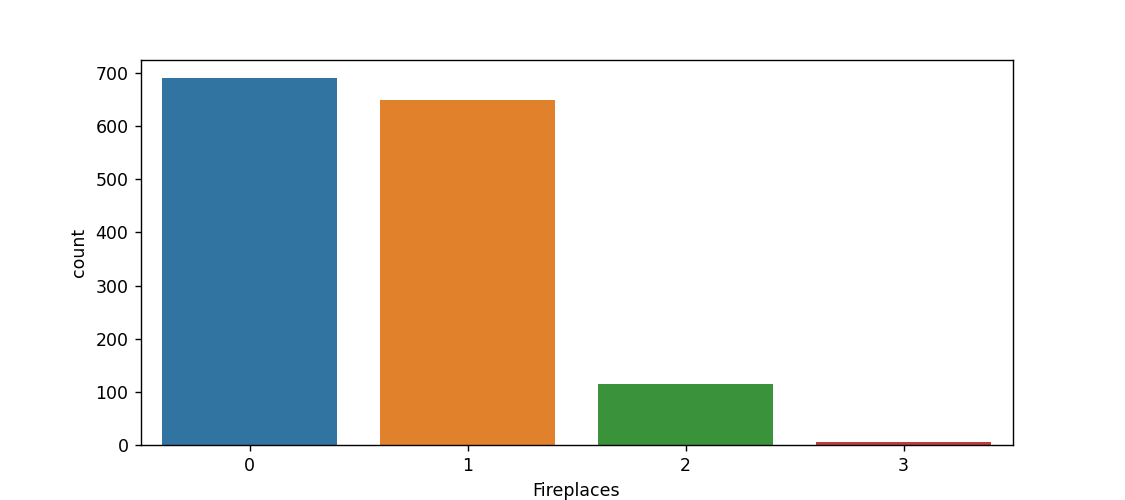

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


GarageCars


<IPython.core.display.Javascript object>


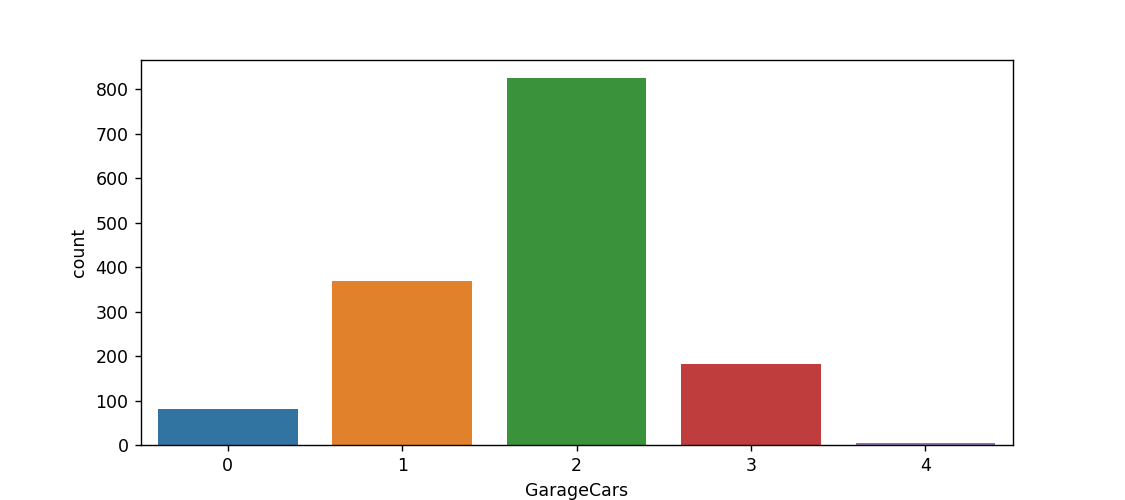

YrSold


C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


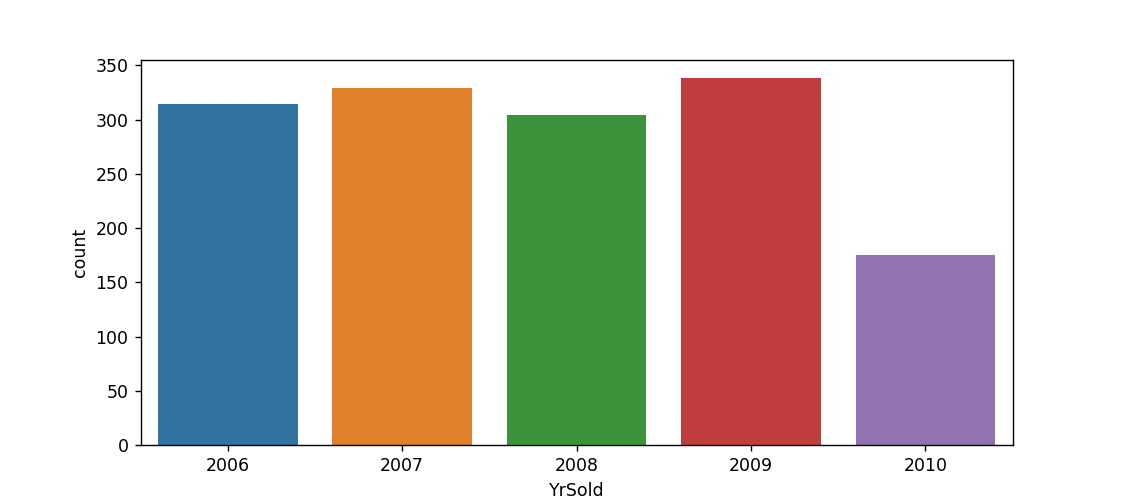

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [18]:
for i in range(len(train_categorical_feature1)):
    if(df_train[train_categorical_feature1[i]].isna().any()==False):
        print(train_categorical_feature1[i])
        plt.figure(figsize=(9, 4))
        ax = sns.countplot(df_train[train_categorical_feature1[i]])
#     label_values(ax)
        plt.show()
    else:
        pass

## Bivariate Analysis

<IPython.core.display.Javascript object>


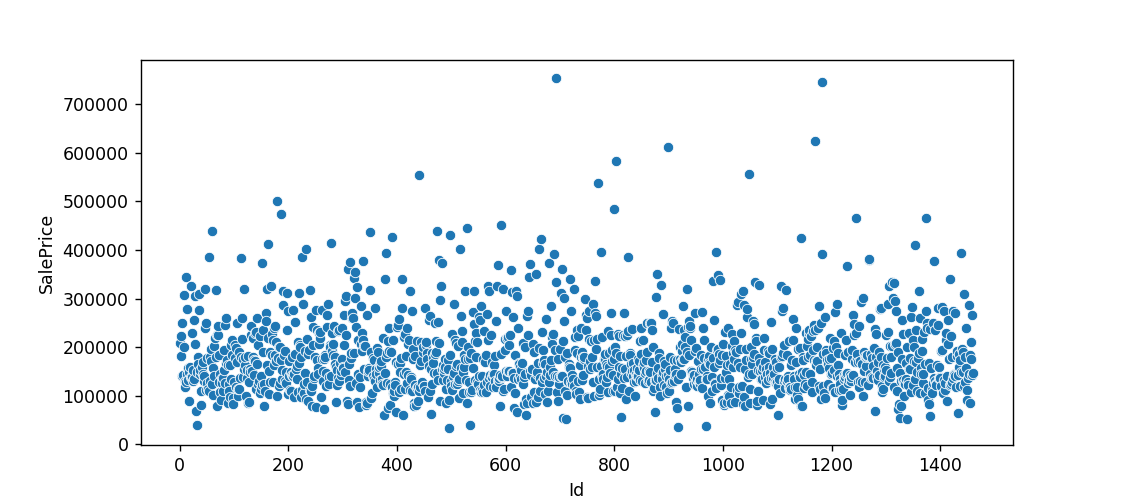

<IPython.core.display.Javascript object>


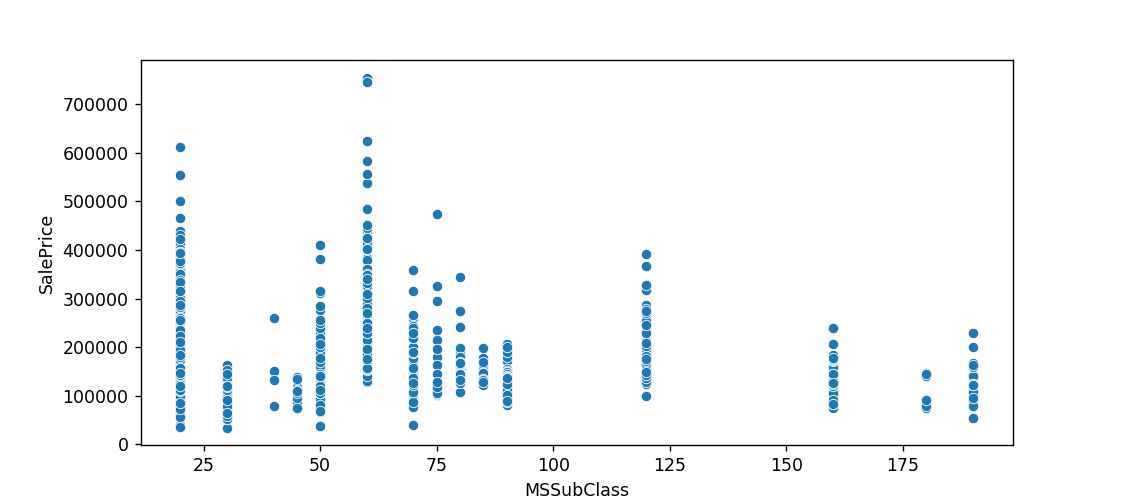

<IPython.core.display.Javascript object>


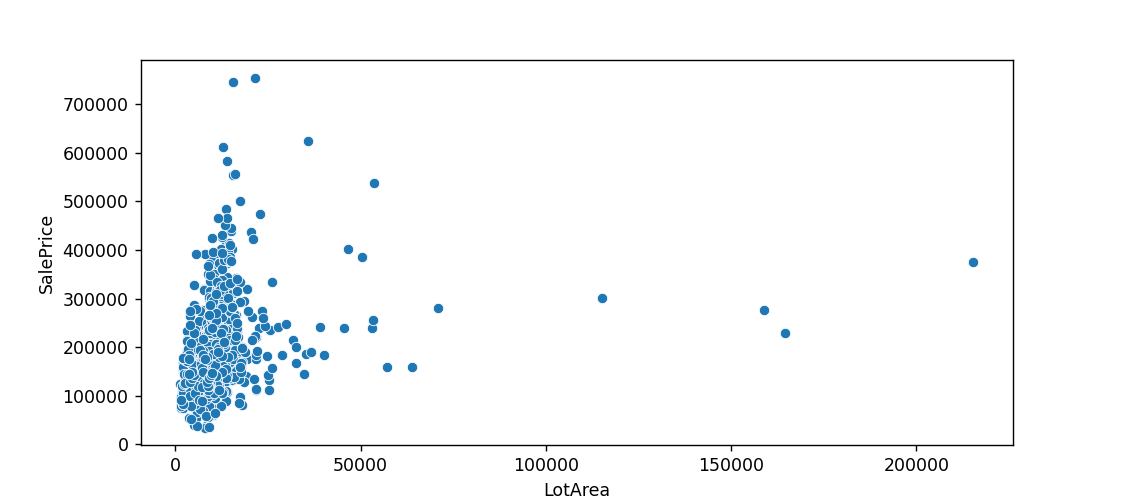

<IPython.core.display.Javascript object>


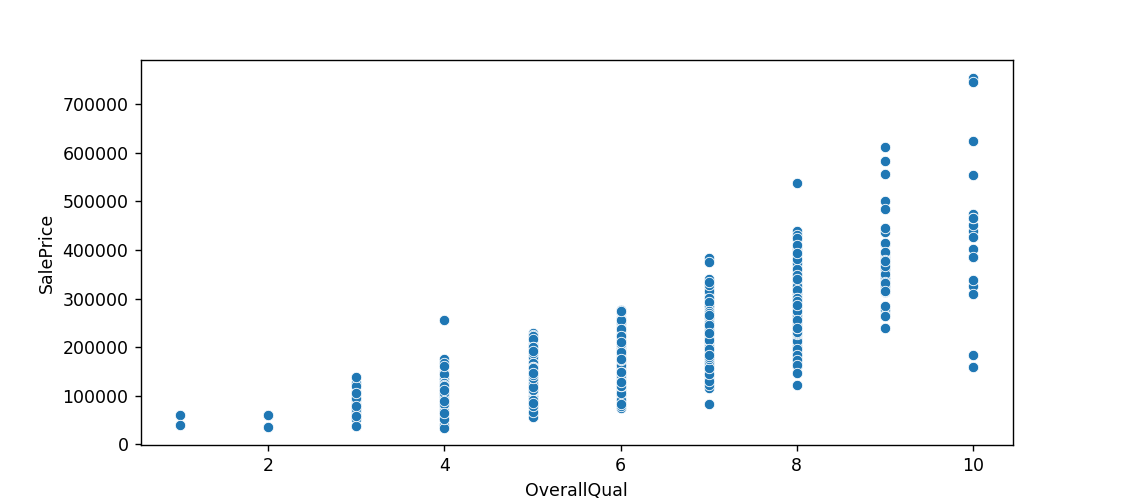

<IPython.core.display.Javascript object>


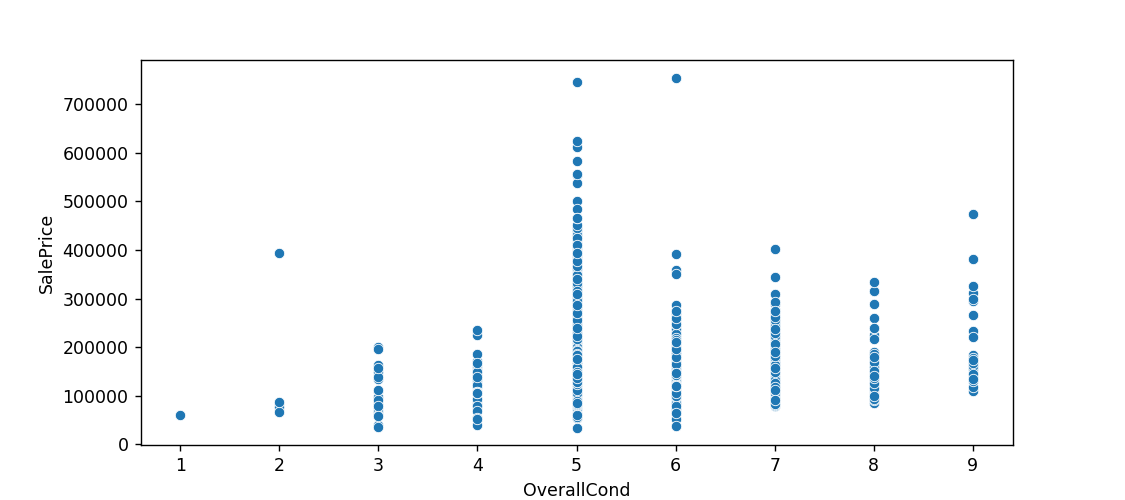

<IPython.core.display.Javascript object>


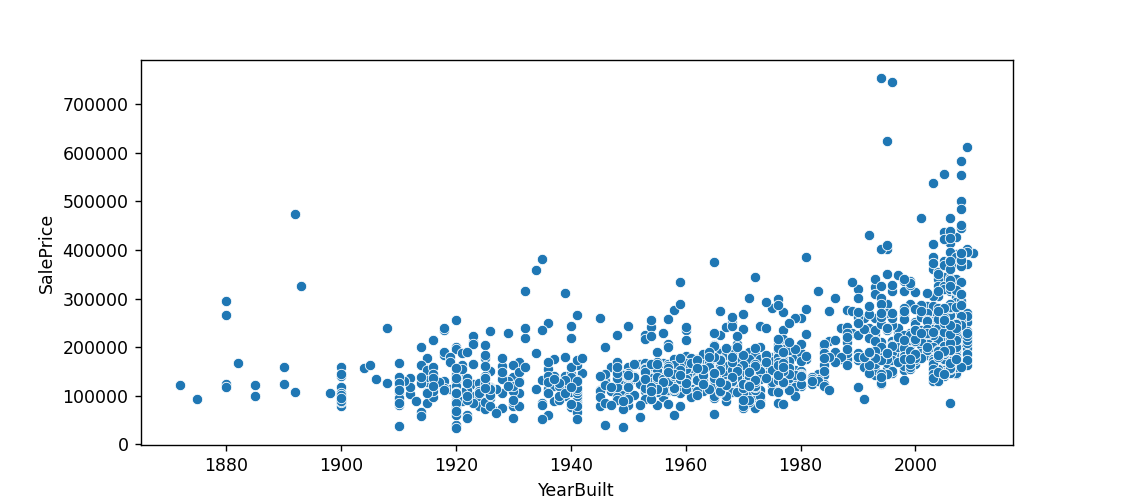

<IPython.core.display.Javascript object>


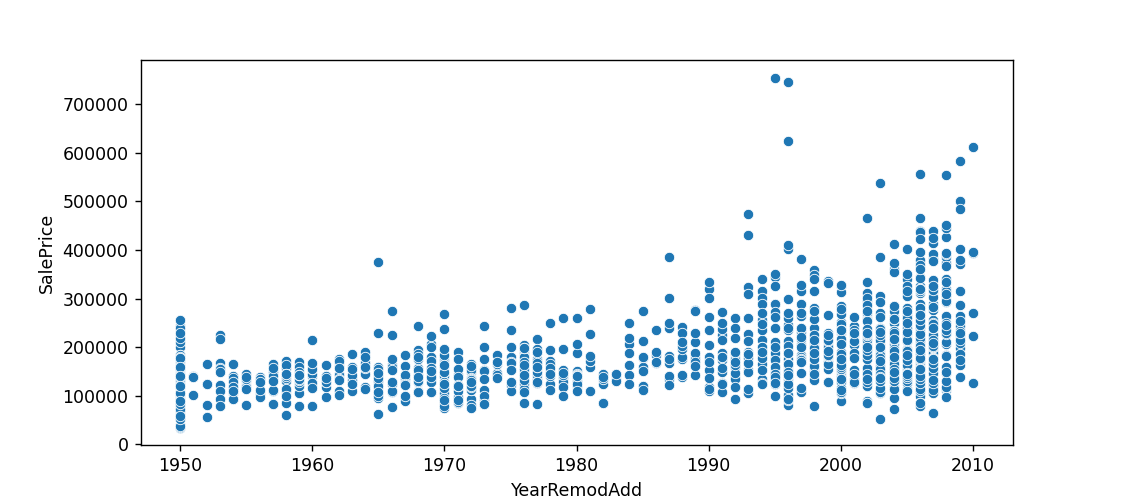

<IPython.core.display.Javascript object>


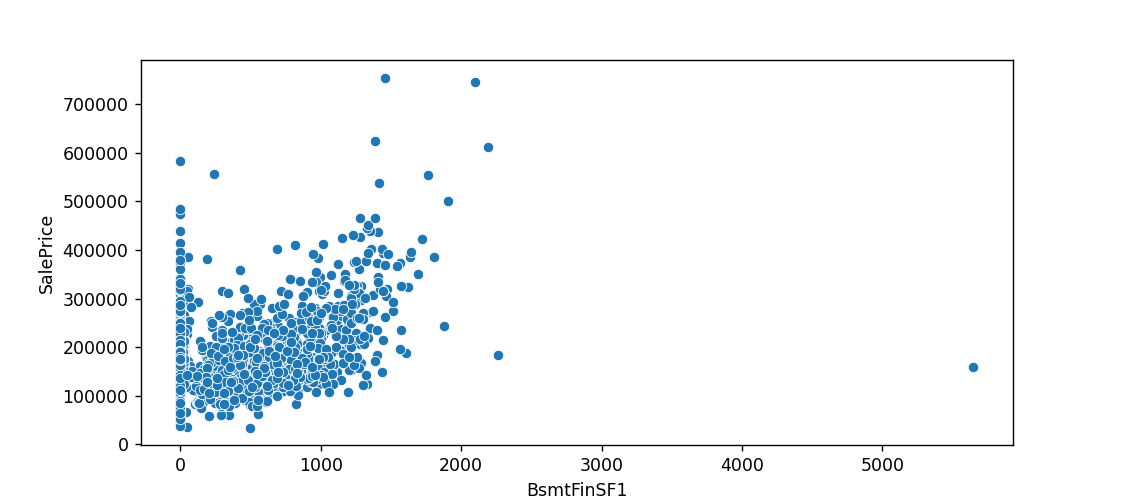

<IPython.core.display.Javascript object>


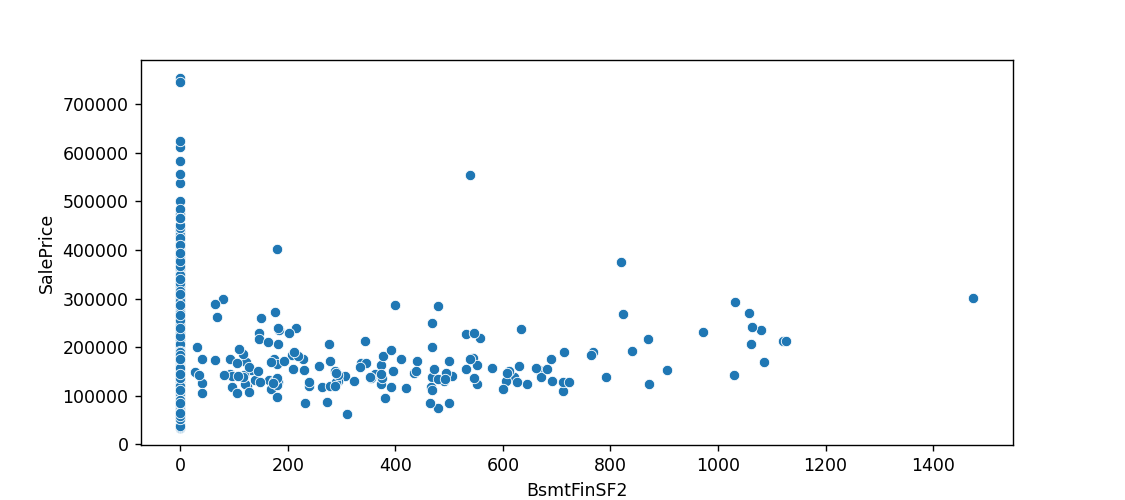

<IPython.core.display.Javascript object>


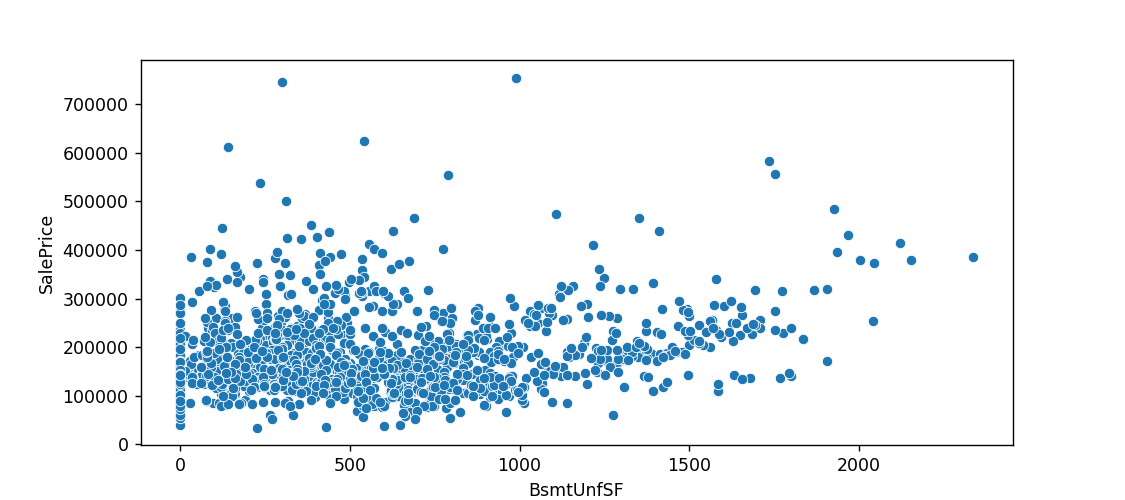

<IPython.core.display.Javascript object>


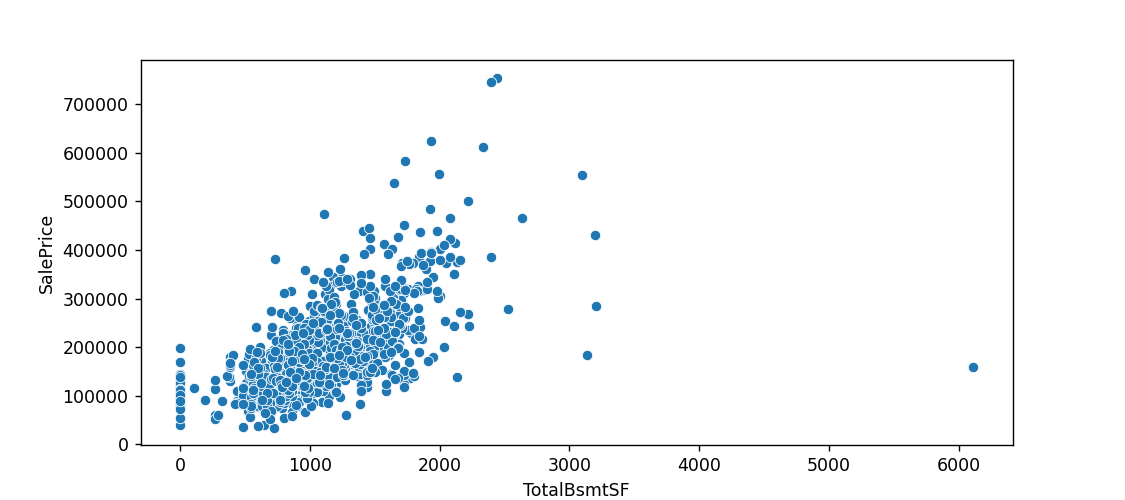

<IPython.core.display.Javascript object>


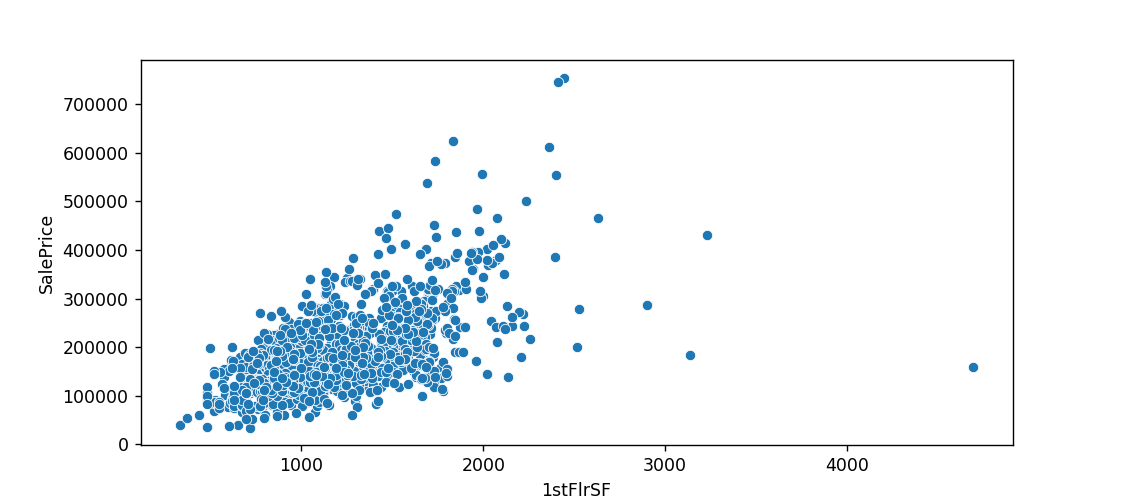

<IPython.core.display.Javascript object>


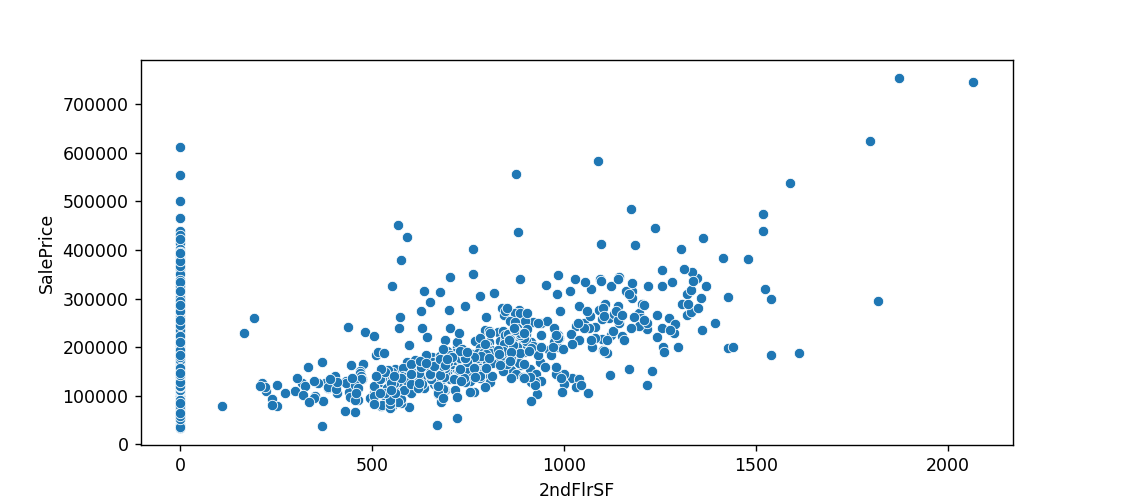

<IPython.core.display.Javascript object>


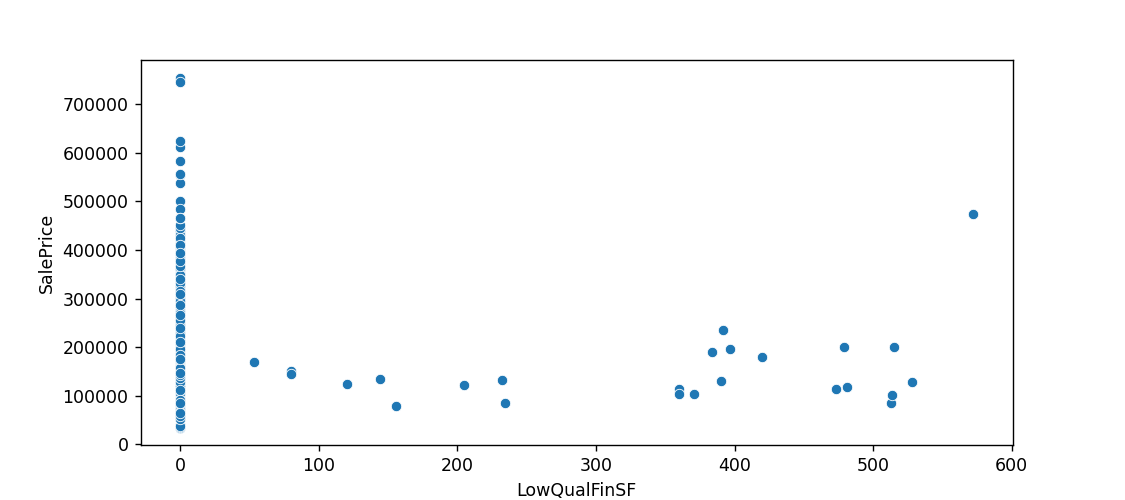

<IPython.core.display.Javascript object>


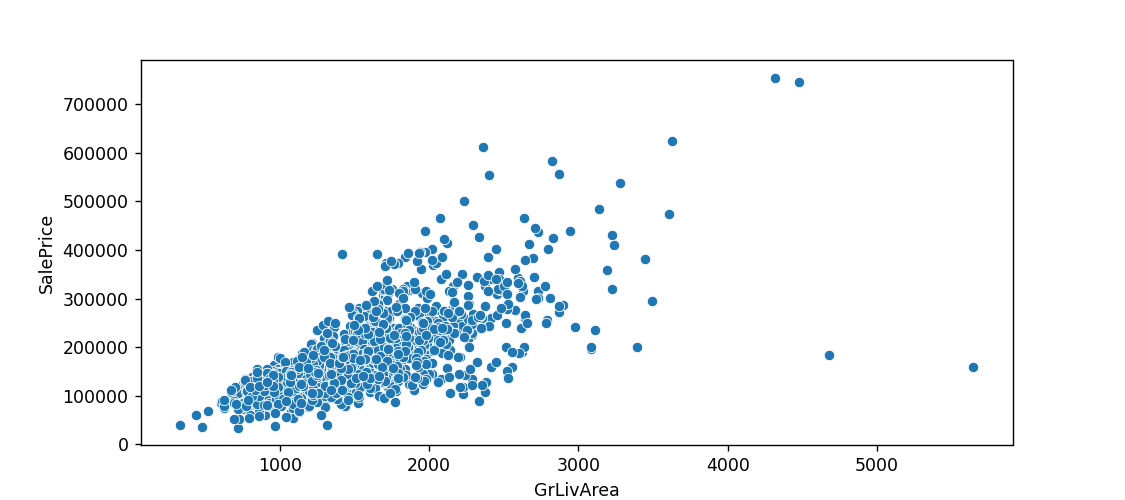

<IPython.core.display.Javascript object>


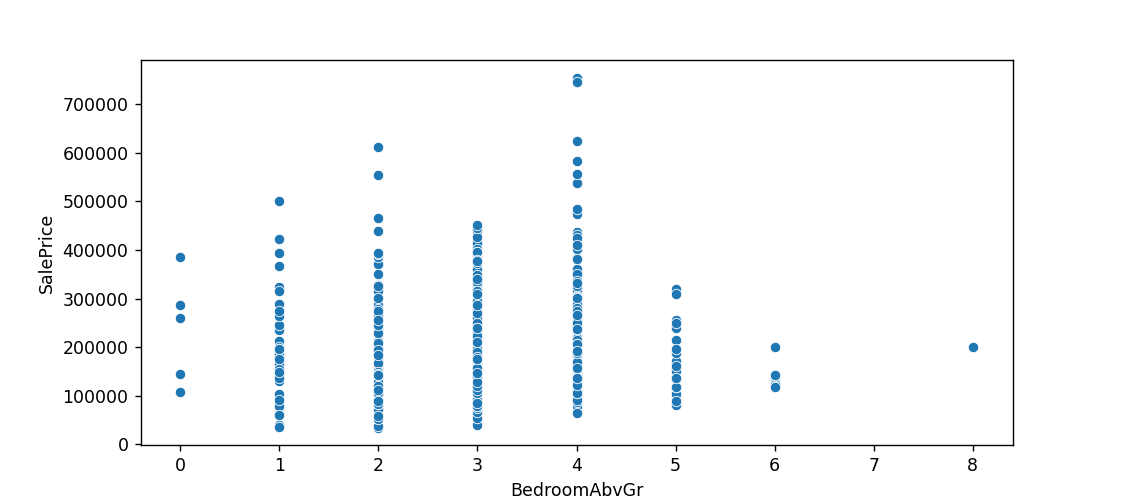

<IPython.core.display.Javascript object>


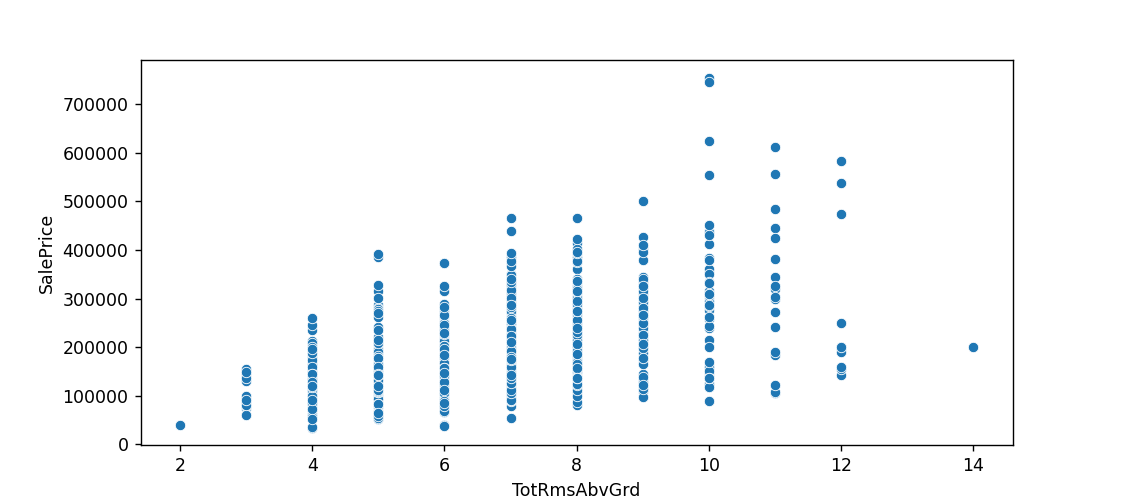

<IPython.core.display.Javascript object>


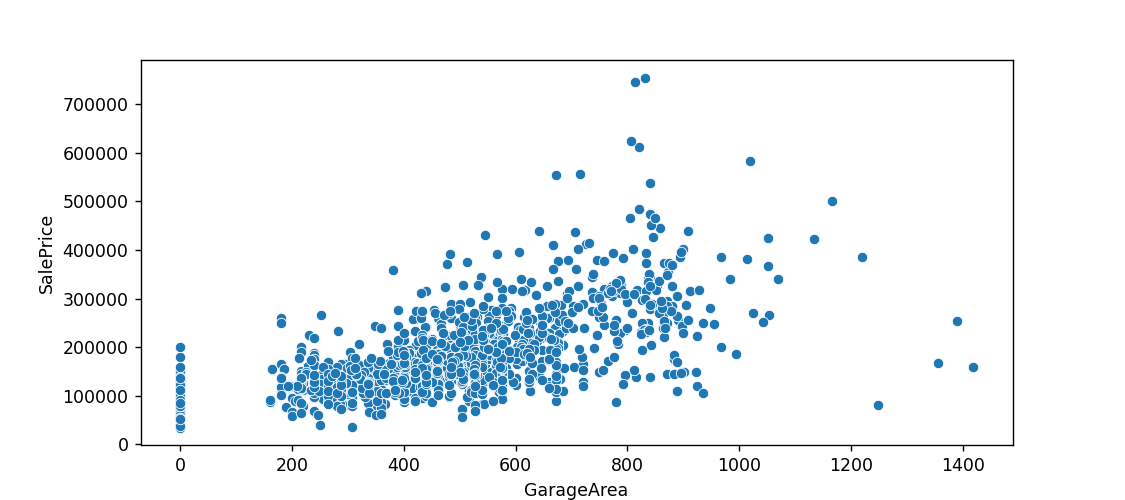

<IPython.core.display.Javascript object>


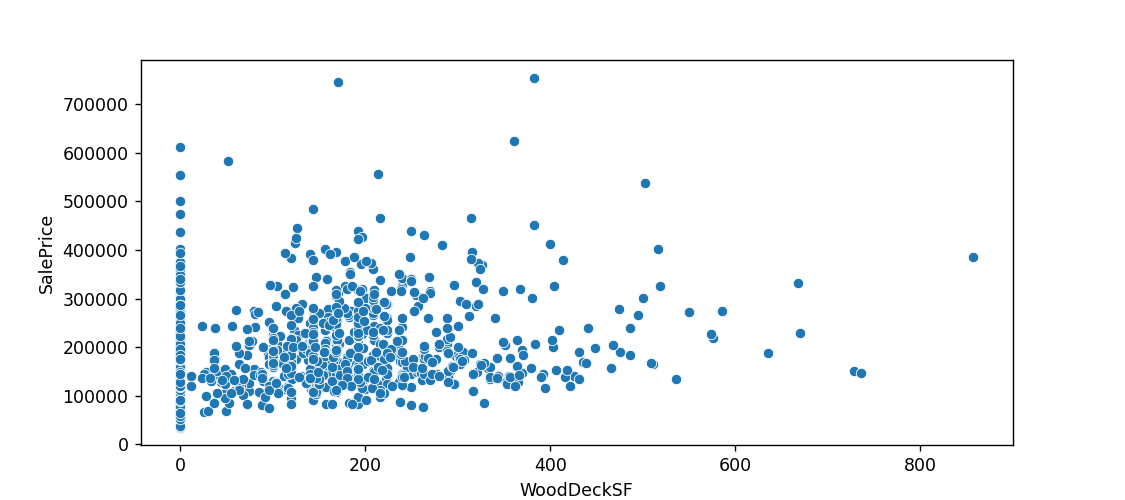

<IPython.core.display.Javascript object>


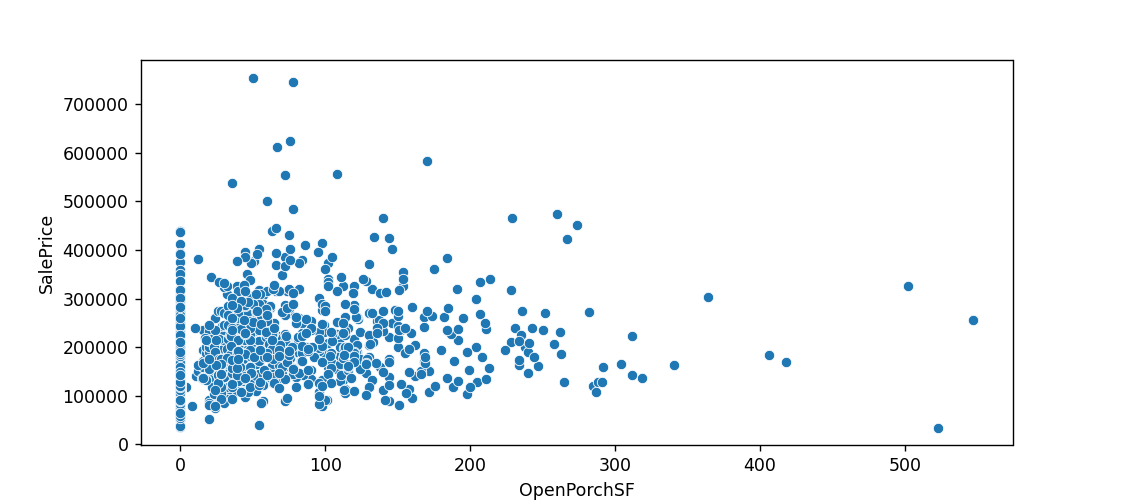

<IPython.core.display.Javascript object>


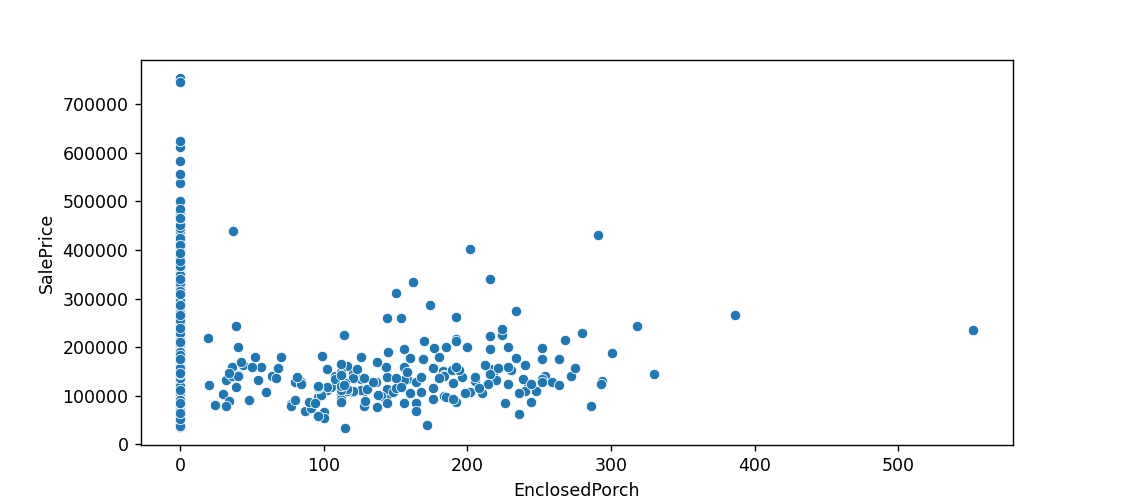

<IPython.core.display.Javascript object>


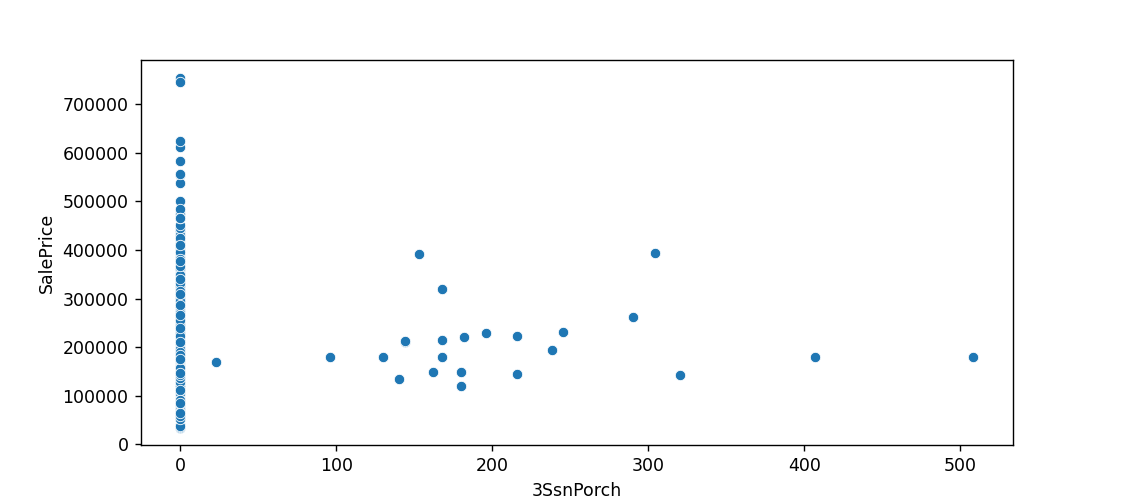

<IPython.core.display.Javascript object>


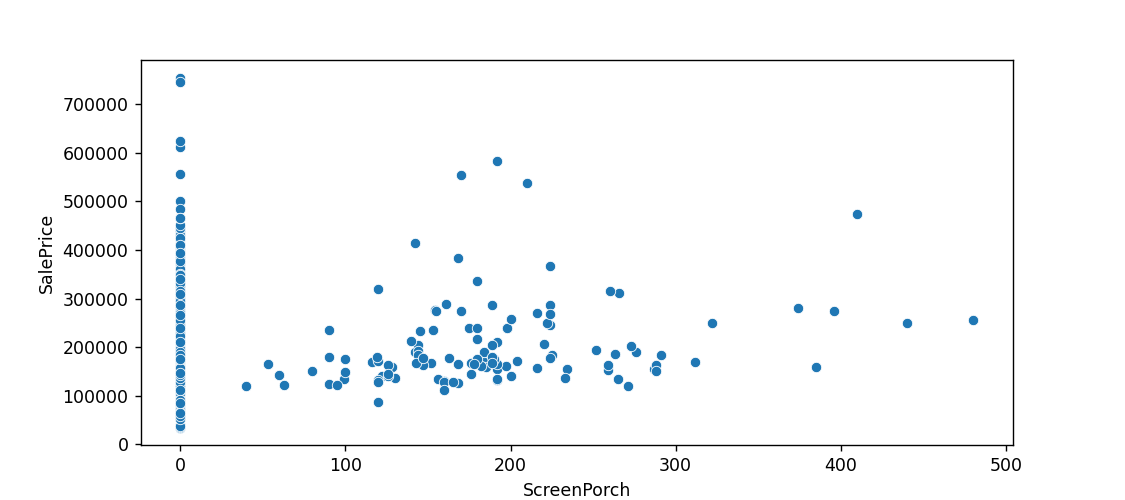

<IPython.core.display.Javascript object>


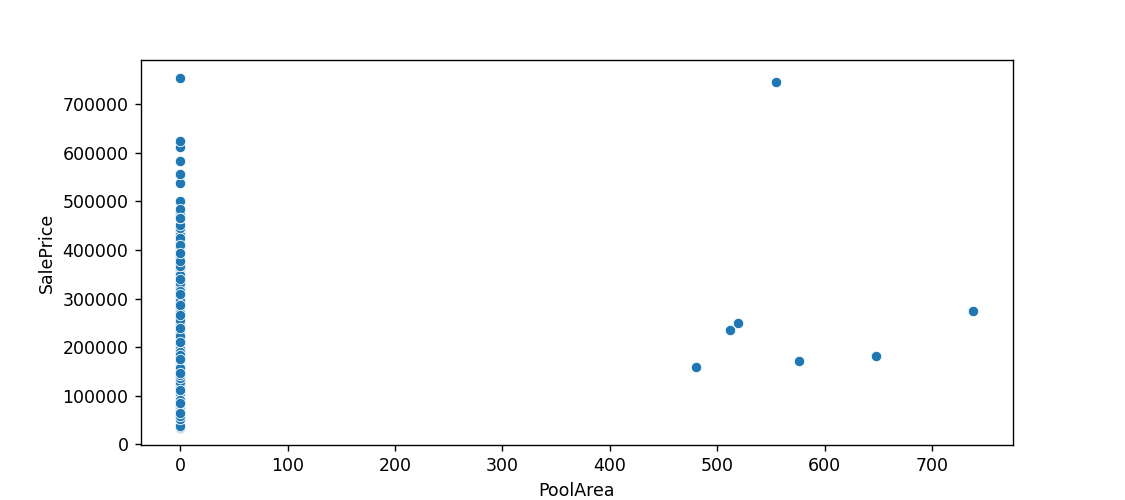

<IPython.core.display.Javascript object>


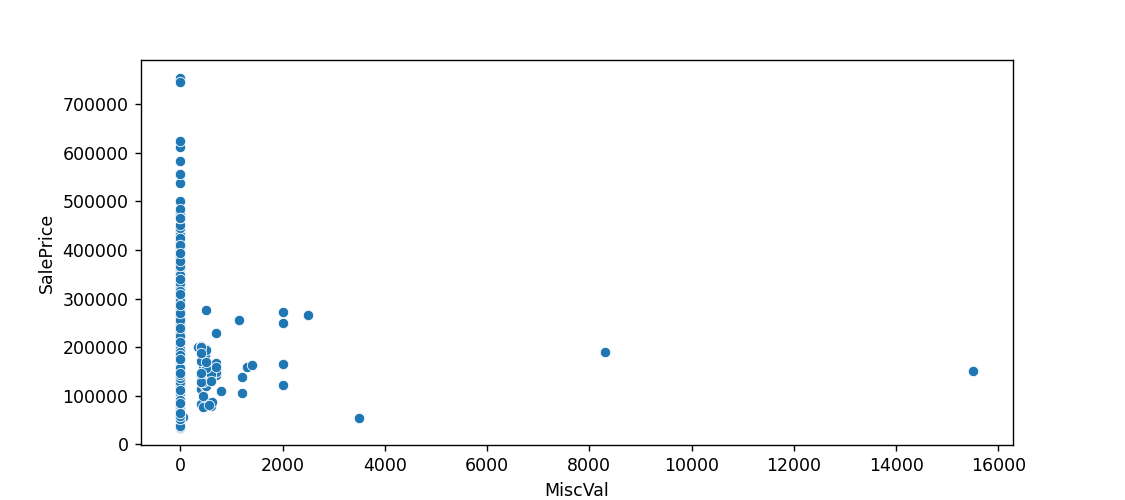

<IPython.core.display.Javascript object>


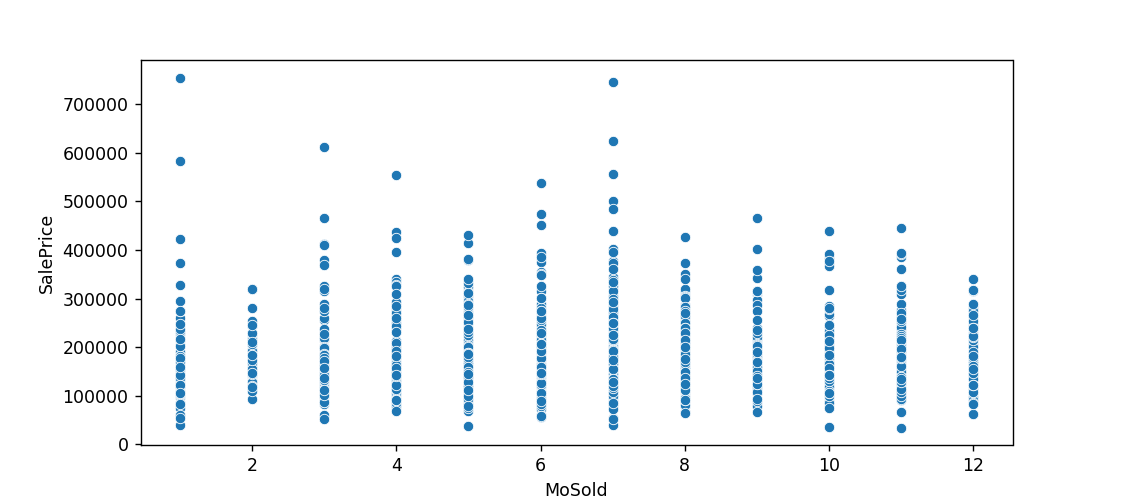

In [19]:
for i in range(len(train_numerical_feature1)):
    if(df_train[train_numerical_feature1[i]].isna().any()==False):
        plt.figure(figsize=(9, 4))
        ax = sns.scatterplot(x=df_train[train_numerical_feature1[i]],y=df_train['SalePrice'])
        plt.show()
    else:
        pass

## Missing Value Treatment

We will simultabeously treat missing values for train and test data 

First training data

In [20]:
df_train[train_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  TotRmsAb

In [21]:
train_with_nan_numerical=['LotFrontage','MasVnrArea','GarageYrBlt']

We are filling the missing values in 'LotFrontage' with the mean value

In [22]:
df_train[train_with_nan_numerical[0]]=df_train[train_with_nan_numerical[0]].fillna(df_train[train_with_nan_numerical[0]].mean())

We are filling the missing values in 'MasVnrArea' with the mean value

In [23]:
df_train[train_with_nan_numerical[1]]=df_train[train_with_nan_numerical[1]].fillna(df_train[train_with_nan_numerical[1]].mean())

In [24]:
df_train[train_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  TotRmsAb

Dropping the GarageYrBlt feature

In [25]:
df_train=df_train.drop('GarageYrBlt',axis=1)

Also removing the GarageYrBlt from the list train_numerical_feature1

In [26]:
train_numerical_feature1.remove('GarageYrBlt')

For test data

In [27]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BedroomAbvGr   1459 non-null   int64  
 18  TotRmsAb

Lets fill the missing value in LotFrontage feature through mean

In [28]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [29]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

In [30]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BedroomAbvGr   1459 non-null   int64  
 18  TotRmsAb

Dropping GarageYrBlt feature

In [31]:
df_test=df_test.drop('GarageYrBlt',axis=1)

In [32]:
try:
    test_numerical_feature1.remove('GarageYrBlt')
except:
    pass

In [33]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BedroomAbvGr   1459 non-null   int64  
 18  TotRmsAb

Treating missing values in categorical variables

For training data

In [34]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

I am simply deleting all these features as it has just say 100 records out of 1460.

In [35]:
df_train=df_train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [36]:
del_feature=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']
train_categorical_feature1=set(train_categorical_feature1)-set(del_feature)

In [37]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ExterQual      1460 non-null   object
 1   Condition2     1460 non-null   object
 2   GarageQual     1379 non-null   object
 3   KitchenAbvGr   1460 non-null   int64 
 4   SaleType       1460 non-null   object
 5   BsmtFinType2   1422 non-null   object
 6   Functional     1460 non-null   object
 7   BsmtFinType1   1423 non-null   object
 8   LandSlope      1460 non-null   object
 9   ExterCond      1460 non-null   object
 10  Foundation     1460 non-null   object
 11  BsmtExposure   1422 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  HalfBath       1460 non-null   int64 
 15  HouseStyle     1460 non-null   object
 16  LotConfig      1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  MSZoning       1460 non-null

C:\Users\parth\AppData\Local\Temp\ipykernel_9472\2411434046.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train[train_categorical_feature1].info()


Filling the missing values with Mode

In [38]:
df_train['MasVnrType'].value_counts()
df_train['MasVnrType']=df_train['MasVnrType'].fillna('None')

In [39]:
print(df_train['Electrical'].value_counts())
df_train['Electrical']=df_train['Electrical'].fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [40]:
print(df_train['BsmtFinType1'].value_counts())
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna('Unf')

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [41]:
print(df_train['BsmtQual'].value_counts())
df_train['BsmtQual']=df_train['BsmtQual'].fillna('TA')

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [42]:
print(df_train['BsmtCond'].value_counts())
df_train['BsmtCond']=df_train['BsmtCond'].fillna('TA')

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [43]:
print(df_train['BsmtExposure'].value_counts())
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna('No')

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [44]:
print(df_train['GarageFinish'].value_counts())
df_train['GarageFinish']=df_train['GarageFinish'].fillna('Unf')

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [45]:
print(df_train['GarageCond'].value_counts())
df_train['GarageCond']=df_train['GarageCond'].fillna('TA')

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [46]:
print(df_train['GarageType'].value_counts())
df_train['GarageType']=df_train['GarageType'].fillna('Attchd')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [47]:
print(df_train['BsmtFinType2'].value_counts())
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna('Unf')

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [48]:
print(df_train['GarageQual'].value_counts())
df_train['GarageQual']=df_train['GarageQual'].fillna('TA')

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [49]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ExterQual      1460 non-null   object
 1   Condition2     1460 non-null   object
 2   GarageQual     1460 non-null   object
 3   KitchenAbvGr   1460 non-null   int64 
 4   SaleType       1460 non-null   object
 5   BsmtFinType2   1460 non-null   object
 6   Functional     1460 non-null   object
 7   BsmtFinType1   1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   ExterCond      1460 non-null   object
 10  Foundation     1460 non-null   object
 11  BsmtExposure   1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  HalfBath       1460 non-null   int64 
 15  HouseStyle     1460 non-null   object
 16  LotConfig      1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  MSZoning       1460 non-null

C:\Users\parth\AppData\Local\Temp\ipykernel_9472\2411434046.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train[train_categorical_feature1].info()


For test data

In [50]:
df_test[test_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   Street         1459 non-null   object 
 2   Alley          107 non-null    object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   Utilities      1457 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  Condition2     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  RoofStyle      1459 non-null   object 
 14  RoofMatl       1459 non-null   object 
 15  Exterior1st    1458 non-null   object 
 16  Exterior2nd    1458 non-null   object 
 17  MasVnrType     1443 non-null   object 
 18  ExterQua

Even here we fill the missing value with mode

In [51]:
df_test=df_test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [52]:
df_test[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExterQual      1459 non-null   object 
 1   Condition2     1459 non-null   object 
 2   GarageQual     1381 non-null   object 
 3   KitchenAbvGr   1459 non-null   int64  
 4   SaleType       1458 non-null   object 
 5   BsmtFinType2   1417 non-null   object 
 6   Functional     1457 non-null   object 
 7   BsmtFinType1   1417 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   ExterCond      1459 non-null   object 
 10  Foundation     1459 non-null   object 
 11  BsmtExposure   1415 non-null   object 
 12  Exterior2nd    1458 non-null   object 
 13  RoofMatl       1459 non-null   object 
 14  HalfBath       1459 non-null   int64  
 15  HouseStyle     1459 non-null   object 
 16  LotConfig      1459 non-null   object 
 17  MasVnrType     1443 non-null   object 
 18  MSZoning

C:\Users\parth\AppData\Local\Temp\ipykernel_9472\3092779282.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test[train_categorical_feature1].info()


In [53]:
print(df_test['Exterior2nd'].value_counts())
df_test['Exterior2nd']=df_train['Exterior2nd'].fillna('VinylSd')

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64


In [54]:
print(df_test['Exterior1st'].value_counts())
df_test['Exterior1st']=df_train['Exterior1st'].fillna('VinylSd')

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


In [55]:
print(df_test['GarageType'].value_counts())
df_test['GarageType']=df_train['GarageType'].fillna('Attchd')

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64


In [56]:
print(df_test['BsmtFinType2'].value_counts())
df_test['BsmtFinType2']=df_train['BsmtFinType2'].fillna('Unf')

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


In [57]:
print(df_test['GarageCars'].value_counts())
df_test['GarageCars']=df_train['GarageCars'].fillna(2)

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64


In [58]:
print(df_test['BsmtCond'].value_counts())
df_test['BsmtCond']=df_train['BsmtCond'].fillna('TA')

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


In [59]:
print(df_test['BsmtExposure'].value_counts())
df_test['BsmtExposure']=df_train['BsmtExposure'].fillna('No')

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64


In [60]:
print(df_test['SaleType'].value_counts())
df_test['SaleType']=df_train['SaleType'].fillna('WD')

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64


In [61]:
print(df_test['MasVnrType'].value_counts())
df_test['MasVnrType']=df_train['MasVnrType'].fillna('None')

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


In [62]:
print(df_test['BsmtFinType1'].value_counts())
df_test['BsmtFinType1']=df_train['BsmtFinType1'].fillna('GLQ')

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [63]:
print(df_test['GarageFinish'].value_counts())
df_test['GarageFinish']=df_train['GarageFinish'].fillna('Unf')

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


In [64]:
print(df_test['MSZoning'].value_counts())
df_test['MSZoning']=df_train['MSZoning'].fillna('RL')

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [65]:
print(df_test['BsmtFullBath'].value_counts())
df_test['BsmtFullBath']=df_train['BsmtFullBath'].fillna(0)

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64


In [66]:
print(df_test['GarageQual'].value_counts())
df_test['GarageQual']=df_train['GarageQual'].fillna('TA')

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64


In [67]:
print(df_test['Utilities'].value_counts())
df_test['Utilities']=df_train['Utilities'].fillna('AllPub')

AllPub    1457
Name: Utilities, dtype: int64


In [68]:
print(df_test['KitchenQual'].value_counts())
df_test['KitchenQual']=df_train['KitchenQual'].fillna('TA')

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


In [69]:
print(df_test['BsmtQual'].value_counts())
df_test['BsmtQual']=df_train['BsmtQual'].fillna('TA')

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


In [70]:
print(df_test['BsmtHalfBath'].value_counts())
df_test['BsmtHalfBath']=df_train['BsmtHalfBath'].fillna(0)

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64


In [71]:
print(df_test['GarageCond'].value_counts())
df_test['GarageCond']=df_train['GarageCond'].fillna('TA')

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64


In [72]:
print(df_test['Functional'].value_counts())
df_test['Functional']=df_train['Functional'].fillna('Typ')

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


## Feature Engineering

Checking whether the month in which the house sold has useful content

<IPython.core.display.Javascript object>


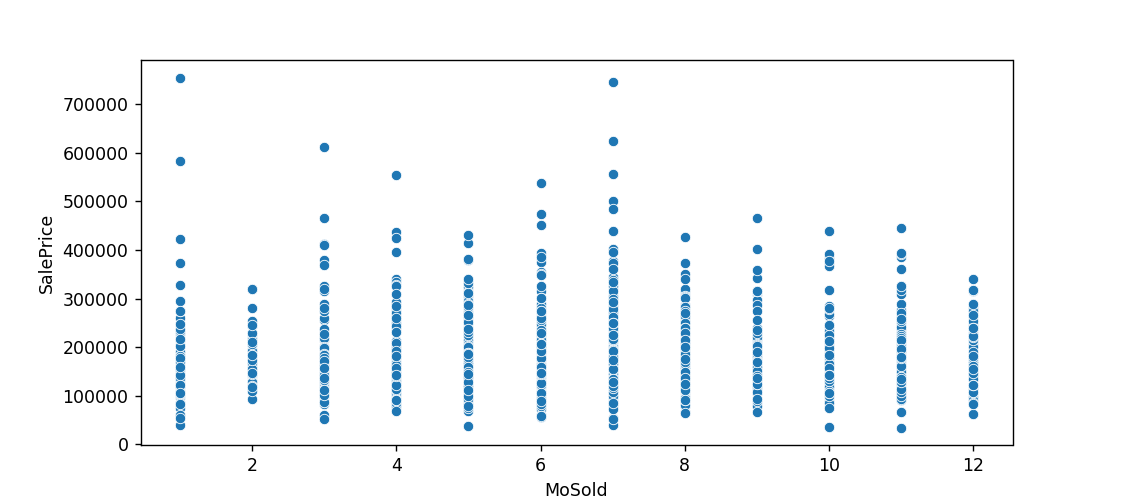

In [73]:
plt.figure(figsize=(9, 4))
ax = sns.scatterplot(x=df_train['MoSold'],y=df_train['SalePrice'])
plt.show()

Here we can see mostly all the month has same amount of sales. So let's drop this feature

In [74]:
df_train=df_train.drop('MoSold',axis=1)

Let's drop this feature in test data too

In [75]:
df_test=df_test.drop('MoSold',axis=1)

### Splitting the target variable from numerical

With the year in which the house, we can't do anything so we calculate the age of the house when it was sold. 

To do this we subtract the year in which it is built from the year in which it is sold

In [76]:
ageofHouse=[]
for i in range(len(df_train)):
    ageofHouse.append(df_train['YrSold'][i]-df_train['YearBuilt'][i])
ageofHouse=pd.DataFrame(ageofHouse)

Lets add this new derived feature to the dataframe

In [77]:
df_train['ageofHouse']=ageofHouse

Lets do the same for test data

In [78]:
test_ageofHouse=[]
for i in range(len(df_test)):
    test_ageofHouse.append(df_test['YrSold'][i]-df_test['YearBuilt'][i])
test_ageofHouse=pd.DataFrame(test_ageofHouse)

In [79]:
df_test['ageofHouse']=test_ageofHouse

The year in which the house sold also has great significance, because if the house is sold in recent past then the price would be high for sure.

So lets create another derived variable. Here we subtract the sold year from the maximum of sold year.

For train data

In [80]:
soldYrComparison=[]
for i in range(len(df_train)):
    soldYrComparison.append(df_train['YrSold'].max()-df_train['YrSold'][i])
soldYrComparison=pd.DataFrame(soldYrComparison)

In [81]:
df_train['soldYrComparison']=soldYrComparison

Lets do the same for test data

In [82]:
test_soldYrComparison=[]
for i in range(len(df_test)):
    test_soldYrComparison.append(df_test['YrSold'].max()-df_test['YrSold'][i])
test_soldYrComparison=pd.DataFrame(test_soldYrComparison)

In [83]:
df_test['soldYrComparison']=test_soldYrComparison

Now we have formed a new derived variable from sold year and built year, so the original built year and sold year features are not needed. Lets delete it from train and test data

In [84]:
df_train=df_train.drop(['YearBuilt','YrSold'],axis=1)

In [85]:
df_test=df_test.drop(['YearBuilt','YrSold'],axis=1)

We also no need the Id feature, because it is just like index

In [86]:
df_train=df_train.drop(['Id'],axis=1)
df_test=df_test.drop(['Id'],axis=1)

Now we have to delete the same features(which we have delete from dataframe) from the list  numerical_feature(both train and test)

In [87]:
train_numerical_feature1.remove('Id')
train_numerical_feature1.remove('MoSold')
train_numerical_feature1.remove('YearBuilt')
train_categorical_feature1.remove('YrSold')

In [88]:
try:
    test_numerical_feature1.remove('Id')
    test_numerical_feature1.remove('MoSold')
    test_numerical_feature1.remove('YearBuilt')
    test_categorical_feature1.remove('YrSold')
except:
    pass

We have the add the feature names of new derived features which we added to the dataframe 

In [89]:
train_numerical_feature1+=['ageofHouse','soldYrComparison']
test_numerical_feature1+=['ageofHouse','soldYrComparison']

We also remove the YearRemodAdd feature

In [90]:
df_train=df_train.drop('YearRemodAdd',axis=1)
df_test=df_test.drop('YearRemodAdd',axis=1)

In [91]:
try:
    train_numerical_feature1.remove('YearRemodAdd')
    test_numerical_feature1.remove('YearRemodAdd')
except:
    pass

Finally we check whether the feature in dataframe and the names f feature in the list(eg:train_numerical_feature1) are same

In [93]:
a=list(df_train.columns)
b=list(train_numerical_feature1)+list(train_categorical_feature1)
list1=[x for x in a if x not in b]
print(list1)

['SalePrice']


In [94]:
a=list(df_test.columns)
b=list(test_numerical_feature1)+list(test_categorical_feature1)
list1=[x for x in a if x not in b]
print(list1)

[]


## Feature selection

First for numerical type features

For this we have to split our numerical data into x(like predictor) and y(target) 

In [95]:
df_xnumtrain=df_train[train_numerical_feature1]
df_ytrain=df_train['SalePrice']

Lets select 15 best features in numerical type features

In [96]:
fs = SelectKBest(score_func=f_regression, k=15)

In [97]:
Xnumerical_selected = fs.fit_transform(df_xnumtrain,df_ytrain )
train_xnumerical_withsel=pd.DataFrame(Xnumerical_selected)

In [98]:
train_xnumerical_withsel.shape

(1460, 15)

Here we can see that 'train_xnumerical_withsel' has only 15 best feature

Now we get the column names of the selected numerical features

In [99]:
filter1 = fs.get_support()

In [100]:
train_selectedlist_numerical=array(train_numerical_feature1)[filter1]
print(train_selectedlist_numerical)

['LotFrontage' 'LotArea' 'OverallQual' 'MasVnrArea' 'BsmtFinSF1'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea'
 'TotRmsAbvGrd' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'ageofHouse']


Above list shows the selected numerical feature names

Since we have the selected features name, we dont want to repeat the same procedure again for test numerical data

### Selection for categorical

In [101]:
try:
    test_categorical_feature1.remove('MiscFeature')
    test_categorical_feature1.remove('Fence')
    test_categorical_feature1.remove('FireplaceQu')
    test_categorical_feature1.remove('Alley')
    test_categorical_feature1.remove('PoolQC')
    test_categorical_feature1.remove('YrSold')
except:
    pass

To avoid redundancy in the feature list we use set

In [102]:
test_categorical_feature1=set(test_categorical_feature1)
train_categorical_feature1=set(train_categorical_feature1)
test_numerical_feature1=set(test_numerical_feature1)
train_numerical_feature1=set(train_numerical_feature1)

Encoding using one hot encoding technique both for train and test catgorical data

In [103]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(df_train[train_categorical_feature1])

C:\Users\parth\AppData\Local\Temp\ipykernel_9472\802842026.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  enc.fit(df_train[train_categorical_feature1])


OneHotEncoder(handle_unknown='ignore')

In [104]:
train_cat_encoded=enc.transform(df_train[train_categorical_feature1]).toarray()

C:\Users\parth\AppData\Local\Temp\ipykernel_9472\1767427209.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_cat_encoded=enc.transform(df_train[train_categorical_feature1]).toarray()


In [105]:
train_cat_encoded=pd.DataFrame(train_cat_encoded)

In [106]:
try:
    test_categorical_feature1.remove('YrSold')
except:
    pass

In [107]:
test_cat_encoded=enc.transform(df_test[test_categorical_feature1]).toarray()

C:\Users\parth\AppData\Local\Temp\ipykernel_9472\1599186034.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_cat_encoded=enc.transform(df_test[test_categorical_feature1]).toarray()
C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [108]:
test_cat_encoded=pd.DataFrame(test_cat_encoded)

Use same feature selection method and get 20 useful variables

In [109]:
fs1 = SelectKBest(score_func=f_regression, k=20)

In [110]:
df_xcat_train=train_cat_encoded
df_ytrain=df_train['SalePrice']

In [111]:
train_Xcategorical_selected = fs1.fit_transform(df_xcat_train,df_ytrain )

In [112]:
train_xcategorical_withsel=pd.DataFrame(train_Xcategorical_selected)

In [113]:
train_xcategorical_withsel.shape

(1460, 20)

Here we can seen just 20 important features have been selected

In [114]:
filter2 = fs1.get_support()

In [115]:
train_selectedlist_categorical=array(train_cat_encoded.columns)[filter2]
print(train_selectedlist_categorical)

[  0   2   3  27  39  53  93 128 163 165 190 193 199 200 211 213 214 218
 221 222]


These are the 20 selected feature columns in all encoded categories..

## At last we are ready for Modeling

In [116]:
x_train_final=pd.concat([df_train[train_selectedlist_numerical],train_cat_encoded[train_selectedlist_categorical]],axis=1)

In [117]:
x_train_final

LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0            65.0     8450            7       196.0         706        150   
1            80.0     9600            6         0.0         978        284   
2            68.0    11250            7       162.0         486        434   
3            60.0     9550            7         0.0         216        540   
4            84.0    14260            8       350.0         655        490   
...           ...      ...          ...         ...         ...        ...   
1455         62.0     7917            6         0.0           0        953   
1456         85.0    13175            6       119.0         790        589   
1457         66.0     9042            7         0.0         275        877   
1458         68.0     9717            5         0.0          49          0   
1459         75.0     9937            5         0.0         830        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  190  193  199  200  \
0             856       856       854       1710  ...  0.0  0.0  0.0  1.0   
1            1262      1262         0       1262  ...  0.0  1.0  0.0  1.0   
2             920       920       866       1786  ...  0.0  0.0  0.0  1.0   
3             756       961       756       1717  ...  0.0  0.0  1.0  0.0   
4            1145      1145      1053       2198  ...  0.0  0.0  0.0  1.0   
...           ...       ...       ...        ...  ...  ...  ...  ...  ...   
1455          953       953       694       1647  ...  0.0  1.0  0.0  1.0   
1456         1542      2073         0       2073  ...  0.0  1.0  0.0  1.0   
1457         1152      1188      1152       2340  ...  0.0  0.0  0.0  1.0   
1458         1078      1078         0       1078  ...  0.0  0.0  1.0  0.0   
1459         1256      1256         0       1256  ...  0.0  1.0  1.0  0.0   

      211  213  214  218  221  222  
0     0.0  0.0  1.0  0.0  0.0  1.0  
1     0.0  0.0  0.0  0.0  0.0  1.0  
2     0.0  0.0  0.0  0.0  0.0  1.0  
3     0.0  1.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  1.0  
...   ...  ...  ...  ...  ...  ...  
1455  0.0  0.0  0.0  0.0  0.0  1.0  
1456  0.0  1.0  0.0  0.0  0.0  0.0  
1457  0.0  0.0  0.0  0.0  1.0  1.0  
1458  0.0  1.0  1.0  0.0  1.0  0.0  
1459  1.0  0.0  1.0  0.0  1.0  0.0  

[1460 rows x 35 columns]

In [118]:
y_train_final=df_train['SalePrice']

We are ready to train the model

In [119]:
lr = LinearRegression()
lr.fit(x_train_final, y_train_final)

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

Preparing test data for prediction

In [120]:
x_test_final=pd.concat([df_test[train_selectedlist_numerical],test_cat_encoded[train_selectedlist_categorical]],axis=1)

In [121]:
x_test_final.shape

(1459, 35)

Prediction

In [122]:
y_pred_final=lr.predict(x_test_final)

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [123]:
y_pred_final.shape

(1459,)

Score is shown below. Kaggle score in this case is calculated with root mean square error.

### Linear regression (RMSE) : 0.21178

Lets save the predicted values in a csv file

In [124]:
idnums=pd.DataFrame(list(range(1461,1461+1459)))
y_pred_df=pd.DataFrame(y_pred_final)

In [125]:
result=pd.concat([idnums,y_pred_df],axis=1)

In [126]:
result.columns=['Id','SalePrice']

In [127]:
result

Id      SalePrice
0     1461  122370.589447
1     1462  168417.098717
2     1463  164046.583663
3     1464  213841.062281
4     1465  210680.243949
...    ...            ...
1454  2915  102033.094410
1455  2916  102709.183344
1456  2917  158464.195316
1457  2918  127417.621254
1458  2919  216557.276466

[1459 rows x 2 columns]

In [128]:
result.to_csv('housePred.csv',sep=',',index=None)
dff=pd.read_csv('housePred.csv',)
dff

Id      SalePrice
0     1461  122370.589447
1     1462  168417.098717
2     1463  164046.583663
3     1464  213841.062281
4     1465  210680.243949
...    ...            ...
1454  2915  102033.094410
1455  2916  102709.183344
1456  2917  158464.195316
1457  2918  127417.621254
1458  2919  216557.276466

[1459 rows x 2 columns]

Let us compare the prediction of linear regression with Random forest regressor

In [129]:
rfr = RandomForestRegressor(n_estimators=100, random_state=50)
rfr.fit(x_train_final, y_train_final)

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(random_state=50)

In [130]:
y_pred_final_rfr=rfr.predict(x_test_final)
y_pred_final_rfr=pd.DataFrame(y_pred_final_rfr)

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The score of random forest regressor is shown below. The kaggle score in this case is calculated using root mean square error.

### Random forest(RMSE): 0.16250

### Here we can see that the random forest regressor model has performed better than the linear regression model

Lets save the predicted values in a csv file

In [131]:
idnums=pd.DataFrame(list(range(1461,1461+1459)))
y_pred_final_rfr_df=pd.DataFrame(y_pred_final_rfr)

In [132]:
result_rfr=pd.concat([idnums,y_pred_final_rfr],axis=1)

In [133]:
result_rfr.columns=['Id','SalePrice']

In [134]:
result_rfr

Id      SalePrice
0     1461  133015.250000
1     1462  158535.090000
2     1463  186554.770000
3     1464  176114.000000
4     1465  201037.150000
...    ...            ...
1454  2915   77442.930000
1455  2916   86331.930000
1456  2917  155010.510000
1457  2918  113588.666667
1458  2919  221189.590000

[1459 rows x 2 columns]

Saving the result in the form of csv

In [135]:
result_rfr.to_csv('housePred_rfr.csv',sep=',',index=None)
dff1=pd.read_csv('housePred_rfr.csv',)
dff1

Id      SalePrice
0     1461  133015.250000
1     1462  158535.090000
2     1463  186554.770000
3     1464  176114.000000
4     1465  201037.150000
...    ...            ...
1454  2915   77442.930000
1455  2916   86331.930000
1456  2917  155010.510000
1457  2918  113588.666667
1458  2919  221189.590000

[1459 rows x 2 columns]

# THE END